# Analysing Irelands Air Transport Sector

# Section 1: Project Management Framework:

For the purpose of this project, the **CRISP-DM** project management framework will be used as a guide for all phases of work. This was chosen as not only is it the most widely used model for data mining projects but it provides a clear and structured approach to planning and implementing a data mining project. It has 6 sequential phases: 

1. **Business Understanding**
   - Determine business objectives
      - Analyse Irelands Transport data and compare the Irish transport sector with other countries woldwide (preferably with a similar population)
       - Assess different methods at predicting passenger numbers and use the best model to forecast numbers for Ireland.
      
   - Assess situation
      - Need to look for appropriate transport data sets (CSO, european commission, government of ireland), air traffic data for other countries and APIs (twitter, reddit etc.) that can be used for scraping data for sentimental analysis.
   - Determing data mining goals
      - This project should include forecasting, sentiment analysis and evidence-based recommendations for the transport sector. The research should focus on one particular area of tranport (i.e public transport, freight, air traffice, road traffic).

2. **Data Understaning**
   - Collect initial data
     - gather data from at least two distinct formats (i.e csv/json/sql db)
   - Describe data
     - descriptive statistics
   - explore data
     - conduct exploratory data analysis on the chosen datasets
   - Verify data quality
   

3. **Data Preparation**
   - Determing data sets to be used (document reasons for inclusion/exclusion)
   - Clean data
   - Feature engineering/extraction
      - using PCA, apply dimensionality reduction methods to prepare the dataset for the model
   - Merge/Integrate/Format the data
   
  
4. **Modeling**
   - Select modelling techniques
      - This project will make use of at least two models for prediction, classification, Clustering, sentimental analysis. Make use of gridSearchCV for hyperparameter tuning.
      - Perform sentimental analysis on a particular transport topic related to Ireland from a producers and consumers point of view.
   - build model
     - split the data into training and testing. Tune any appropriate hyperparameters and fit data to model.
   - Assess model
     - Use cross validation to provide authenticity of the modelling outcomes
     - table/graphic to illustrate similarities/contrast of the model outcomes
   

5. **Evaluation**
   - Evaluate results
   - Review process
   - Determine next steps
   

6. **Deployment**
   - Develop an interactive dashboard tailored to model Transport planning to  showcase the information evidence gathered following previous analysis.
   - Produce final report document



# Section 2: Optimisation strategy for this project:

- To avoid any repeated code and to allow for ease of troubleshooting any issues with the code, functions will be utilised across all aspected of this project. 
- Loops will be used in conjunction with any defined funtions if it is required to apply the function to a list of different arguments. This will remove any unneccesary overhead introduced by definining many variables or creating a lot of temporary tables. 
- The project will be split into 4 seperate jupyter notebooks with any required datasets for each notebook loaded in at the start of each notebook. Instead of having one very large notebook, this will spread the load across multiple instances and will remove any requirement to restart the kernal of one very large notebook, which may be time consuming.
- To ensure all code is doing what it is meant to, the use of visualisations and EDA tools such as .head(), .shape() will be used sequentially after code is executed on the tables being manipulated to ensure all changes look correct.
- Some validation checks will also be performed, i.e comparing new data to old data (before code executed), to ensure changes have been picked up as expected.


# Section 3 - Data Understanding

In [1]:
##importing all necessary packages
import pandas as pd
import requests
import json
from pyjstat import pyjstat

#importing visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
#pyjstat may need to be installed, in that case uncomment the next cell and run:

In [3]:
#!pip install pyjstat

## 3.1 Loading in the Air Traffic Data

In [4]:
# loading in the air traffic data from CSO 
# reading in from CSO REST API
URL = 'https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/TAM05/JSON-stat/2.0/en'

#using pyjstat to read in json format
dataset = pyjstat.Dataset.read(URL)

#converting json format to dataframe 
airtraffic_df = dataset.write('dataframe')
airtraffic_df.head()

,Statistic,Month,Airports in Ireland,Country,Direction,Flight Type,value
0,Passengers,2013M01,All main airports,All Countries,All directions,All flights,1398.7
1,Passengers,2013M01,All main airports,All Countries,All directions,Scheduled,1372.4
2,Passengers,2013M01,All main airports,All Countries,All directions,Unscheduled,26.3
3,Passengers,2013M01,All main airports,All Countries,Arrival,All flights,687.1
4,Passengers,2013M01,All main airports,All Countries,Arrival,Scheduled,674.0


In [5]:
# loading in the air traffic data from CSO 
# reading in from CSO REST API

URL = 'https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/TAM03/JSON-stat/2.0/en'

#using pyjstat to read in json format
dataset = pyjstat.Dataset.read(URL)

#converting from json format to dataframe
airtraffic_df_old = dataset.write('dataframe')

#re-ordering the columns in the dataframe to ensure it is aligned with airtraffic_df for concatenation
airtraffic_df_old = airtraffic_df_old[['Statistic','Month','Airports in Ireland','Country','Direction','Flight Type','value']]

#removing the 2013 data from the older dataset as 2013 is also included in the new dataset,
#so this is done to avoid duplication
airtraffic_df_old = airtraffic_df_old[~airtraffic_df_old['Month'].str.contains('2013')]

pyjstat is a python library for JSON-stat formatted data manipulation which allows reading and writing JSON-stat. Using the pyjstat.Dataset.read method I am able to read in the json directly from CSO using the RESTful API url provided. I chose this method to load in these files due to the size of the datasets (>1 million records). By reading them directly from the API, I dont have to download the large files seperately and load them in to the notebook.

ref: https://pypi.org/project/pyjstat/

In [6]:
airtraffic_df_old.head()

,Statistic,Month,Airports in Ireland,Country,Direction,Flight Type,value
0,Passengers,2005M01,All main airports,All Countries,All directions,All flights,1548.1
1,Freight,2005M01,All main airports,All Countries,All directions,All flights,5.6
2,Commercial Flights,2005M01,All main airports,All Countries,All directions,All flights,17.3
3,Passengers,2005M02,All main airports,All Countries,All directions,All flights,1586.4
4,Freight,2005M02,All main airports,All Countries,All directions,All flights,6.1


## 3.2 Choosing Pandas for data manipulation: 
Choosing the right tool for working with datasets is an essential step in the data analysis process. Pandas was chosen as the library for processing and aggregating the data for this project. Even though other equivalent libraries, such as POLARS are much faster than pandas, this is only offering a significant advantage when working with extremely large datasets. Pandas compatibility with most of pythons visualization packages and machine learning libraries such as scikit-learn make it an obvious choice for this project. (Chaudhary, 2023) Numpy is another library that outperforms pandas for speed, however this does not work well with tabular data and is mostly used for arrays.


In [7]:
#concatenting both datasets together to get 
airtraffic_df = pd.concat([airtraffic_df_old,airtraffic_df])

## 3.3 perfoming EDA on Irish air traffic dataset

In [13]:
#gtaking a look at the distinct Statistic column values
airtraffic_df['Statistic'].unique()

array(['Passengers', 'Freight', 'Commercial Flights'], dtype=object)

**Note**: Although not visible in the dataframe above, the dataset description outlines that the "Value" column is given in thousands for Statistic = "Passengers" and "Commercial Flights" and thousands of tonnes for "Freight". 

In [14]:
#checking the types of the columns
airtraffic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2246130 entries, 0 to 1175633
Data columns (total 7 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Statistic            object 
 1   Month                object 
 2   Airports in Ireland  object 
 3   Country              object 
 4   Direction            object 
 5   Flight Type          object 
 6   value                float64
dtypes: float64(1), object(6)
memory usage: 137.1+ MB


In [15]:
#checking the amount of unique values for each column
airtraffic_df.nunique()

Statistic                  3
Month                    219
Airports in Ireland        7
Country                   65
Direction                  3
Flight Type                3
value                  11125
dtype: int64

In [16]:
#checking how many rows and columns there are in the dataset
airtraffic_df.shape

(2246130, 7)

In [17]:
#checking for duplicates
airtraffic_df.duplicated().sum()

0

In [18]:
#diplaying the descriptive statistics, including the columns that arent numerical
airtraffic_df.describe(include='all')

,Statistic,Month,Airports in Ireland,Country,Direction,Flight Type,value
count,2246130,2246130,2246130,2246130,2246130,2246130,2.246127e+06
unique,3,219,7,65,3,3,NaN
top,Passengers,2005M01,All main airports,All Countries,All directions,All flights,NaN
freq,748710,11151,348867,38070,748710,748710,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,7.440831e+00
std,NaN,NaN,NaN,NaN,NaN,NaN,8.534822e+01
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00


In [19]:
airtraffic_df.head()

,Statistic,Month,Airports in Ireland,Country,Direction,Flight Type,value
0,Passengers,2005M01,All main airports,All Countries,All directions,All flights,1548.1
1,Freight,2005M01,All main airports,All Countries,All directions,All flights,5.6
2,Commercial Flights,2005M01,All main airports,All Countries,All directions,All flights,17.3
3,Passengers,2005M02,All main airports,All Countries,All directions,All flights,1586.4
4,Freight,2005M02,All main airports,All Countries,All directions,All flights,6.1


**Some initial observations on the dataset:**

- Data is mostly categorical - Statistic, Month, Airports in Ireland, Country, Direction, Flight Type.
- Only one continuous column - value, which denotes the volumn of passengers (in thousands), tonnes of freight (in thousands) and the number of commercial flights (in thousands).
- Month column contains year and month.
- Since each of the Statistic (i.e Passengers, Freight, Commercial Flights) have a different definition of the value column, it may be useful to split these up into individual columns (i.e pivot) 

In [20]:
#looking at the unique values for the "Airports in Ireland" column
airtraffic_df['Airports in Ireland'].unique()

array(['All main airports', 'Cork', 'Dublin', 'Galway', 'Kerry', 'Knock',
       'Shannon'], dtype=object)

In [21]:
#looking at the unique values for the "Country" column
airtraffic_df['Country'].unique()

array(['All Countries', 'Ireland (domestic)', 'Europe (2)',
       'EU27 excluding Ireland', 'Austria', 'Belgium', 'Bulgaria',
       'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'Italy', 'Latvia',
       'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland',
       'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
       'United Kingdom (1)', 'England', 'Northern Ireland', 'Scotland',
       'Wales', 'Other UK (1)', 'Croatia', 'Iceland', 'Norway',
       'Russian Federation', 'Serbia', 'Switzerland', 'Other Europe (12)',
       'America (4)', 'Canada', 'United States', 'Other America (5)',
       'Africa (5)', 'Canary Islands', 'Eygpt', 'Morocco', 'Tunisia',
       'Other Africa (6)', 'Asia (5)', 'Bahrain', 'Israel', 'Turkey',
       'United Arab Emirates', 'Other Asian countries (4)',
       'Oceania and Polar regions (1)', 'EU28 excluding Ireland',
       'Russia', 'Other Europe (25)', 'Africa (9)

In [22]:
#checking for null values in the dataset
airtraffic_df.isnull().sum()

Statistic              0
Month                  0
Airports in Ireland    0
Country                0
Direction              0
Flight Type            0
value                  3
dtype: int64

In [23]:
#isolation null values in dataframe
airtraffic_df[airtraffic_df['value'].isnull()]

,Statistic,Month,Airports in Ireland,Country,Direction,Flight Type,value
1156277,Commercial Flights,2022M09,Shannon,England,All directions,Unscheduled,NaN
1156280,Commercial Flights,2022M09,Shannon,England,Arrival,Unscheduled,NaN
1156283,Commercial Flights,2022M09,Shannon,England,Departure,Unscheduled,NaN


In [24]:
#looking at data for the same statistic/month/airport/Country to see what is happening
airtraffic_df[(airtraffic_df['Statistic']=='Commercial Flights') & (airtraffic_df['Month']==('2022M09'))
              & (airtraffic_df['Airports in Ireland']=='Shannon') & (airtraffic_df['Country']=='England')].tail(50)

,Statistic,Month,Airports in Ireland,Country,Direction,Flight Type,value
1156275,Commercial Flights,2022M09,Shannon,England,All directions,All flights,0.4
1156276,Commercial Flights,2022M09,Shannon,England,All directions,Scheduled,0.4
1156277,Commercial Flights,2022M09,Shannon,England,All directions,Unscheduled,NaN
1156278,Commercial Flights,2022M09,Shannon,England,Arrival,All flights,0.2
1156279,Commercial Flights,2022M09,Shannon,England,Arrival,Scheduled,0.2
1156280,Commercial Flights,2022M09,Shannon,England,Arrival,Unscheduled,NaN
1156281,Commercial Flights,2022M09,Shannon,England,Departure,All flights,0.2
1156282,Commercial Flights,2022M09,Shannon,England,Departure,Scheduled,0.2
1156283,Commercial Flights,2022M09,Shannon,England,Departure,Unscheduled,NaN


From the above, it can be observed that the Null values (NaN) can simply be imputed from the dataset. i.e All flights = Scheduled + Unscheduled for each Direction value. In the case of all these NaN values, they are simpy 0.0. 

In [25]:
# filling these null values with their float values
airtraffic_df['value'] = airtraffic_df['value'].fillna(0.0)

In [26]:
# no more null values
airtraffic_df.isnull().sum()

Statistic              0
Month                  0
Airports in Ireland    0
Country                0
Direction              0
Flight Type            0
value                  0
dtype: int64

### 3.3.1 pivoting on "Statistic" column

To get a clearer understanding of the data, the airtraffic dataframe will be split up into three dataframes based on the unique Statistic value (i.e passenger, freight, commercial flights). The three dataframes will then be merged back together using the other categorical columns as the keys, to create three columns for each of these Statistic values. In essence, I am pivoting the Statistic column into three seperate value columns.

In [28]:
##creating three seperate dataframes based on Statistic values, then dropping the unnecessary Statistic column 
passengers_df = airtraffic_df[airtraffic_df['Statistic']=='Passengers'].drop(columns='Statistic')
passengers_df.rename(columns={'value':'passengers'}, inplace=True)

freight_df = airtraffic_df[airtraffic_df['Statistic']=='Freight'].drop(columns='Statistic')
freight_df.rename(columns={'value':'freight'}, inplace=True)

flights_df = airtraffic_df[airtraffic_df['Statistic']=='Commercial Flights'].drop(columns='Statistic')
flights_df.rename(columns={'value':'commercial_flights'}, inplace=True)

#merging back together to create a new dataframe with the passengers, freight and commercial flight values now as columns
mergeColList = ['Month', 'Airports in Ireland', 'Country', 'Direction', 'Flight Type']
airtraffic_df = pd.merge(passengers_df, freight_df, how='left', on=mergeColList)
airtraffic_df =pd.merge(airtraffic_df, flights_df, how='left', on=mergeColList)

In [29]:
airtraffic_df.head()

,Month,Airports in Ireland,Country,Direction,Flight Type,passengers,freight,commercial_flights
0,2005M01,All main airports,All Countries,All directions,All flights,1548.1,5.6,17.3
1,2005M02,All main airports,All Countries,All directions,All flights,1586.4,6.1,16.5
2,2005M03,All main airports,All Countries,All directions,All flights,1914.3,6.5,18.6
3,2005M04,All main airports,All Countries,All directions,All flights,1878.0,6.0,18.9
4,2005M05,All main airports,All Countries,All directions,All flights,2267.3,6.0,22.2


In [30]:
#getting descriptive statistics of the three numerical columns
airtraffic_df.describe()

,passengers,freight,commercial_flights
count,748710.000000,748710.000000,748710.000000
mean,22.041406,0.099017,0.182039
std,146.735722,0.627809,1.187910
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.200000,0.000000,0.000000
max,4040.600000,18.500000,26.800000


In [31]:
#taking a look at the non-numerical columns
airtraffic_df.describe(include=object)

,Month,Airports in Ireland,Country,Direction,Flight Type
count,748710,748710,748710,748710,748710
unique,219,7,65,3,3
top,2005M01,All main airports,All Countries,All directions,All flights
freq,3717,116289,12690,249570,249570


In [32]:
#checking the types of the updated dataset
airtraffic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 748710 entries, 0 to 748709
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Month                748710 non-null  object 
 1   Airports in Ireland  748710 non-null  object 
 2   Country              748710 non-null  object 
 3   Direction            748710 non-null  object 
 4   Flight Type          748710 non-null  object 
 5   passengers           748710 non-null  float64
 6   freight              748710 non-null  float64
 7   commercial_flights   748710 non-null  float64
dtypes: float64(3), object(5)
memory usage: 51.4+ MB


In [33]:
#taking a look at the data
airtraffic_df.head()

,Month,Airports in Ireland,Country,Direction,Flight Type,passengers,freight,commercial_flights
0,2005M01,All main airports,All Countries,All directions,All flights,1548.1,5.6,17.3
1,2005M02,All main airports,All Countries,All directions,All flights,1586.4,6.1,16.5
2,2005M03,All main airports,All Countries,All directions,All flights,1914.3,6.5,18.6
3,2005M04,All main airports,All Countries,All directions,All flights,1878.0,6.0,18.9
4,2005M05,All main airports,All Countries,All directions,All flights,2267.3,6.0,22.2


### 3.3.2 Plotting distributions

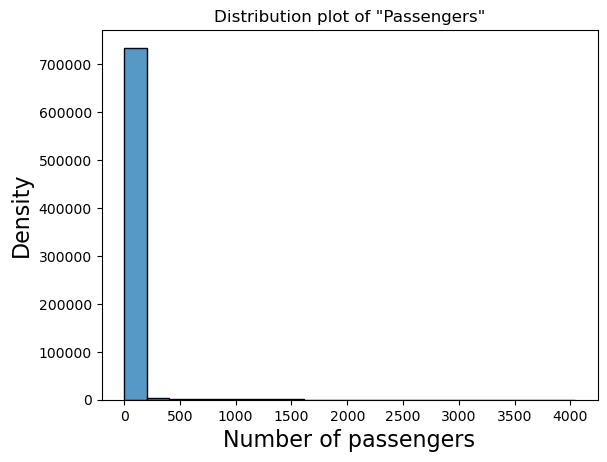

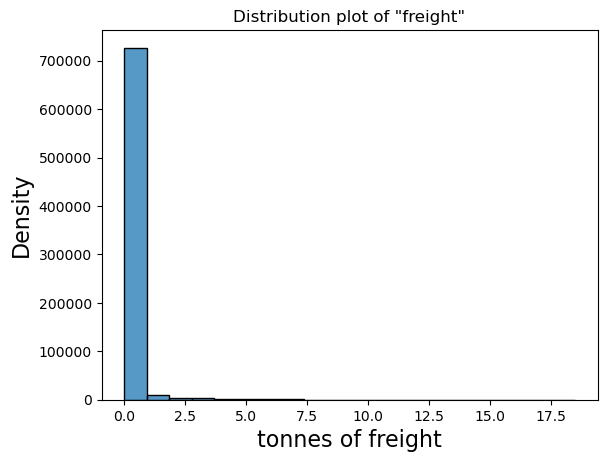

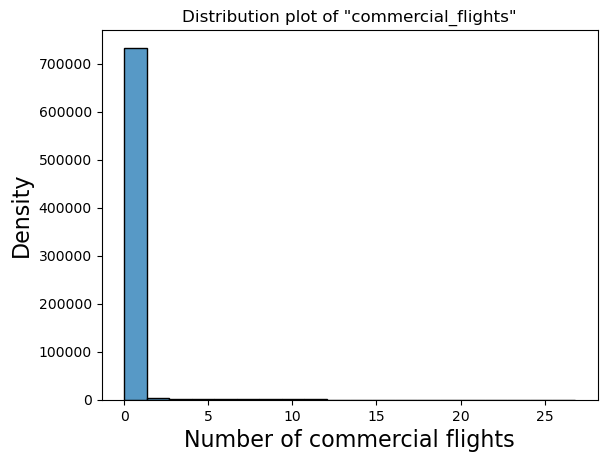

In [34]:
#plotting distribution plot of each numerical columns to get an idea of the data range
sns.histplot(airtraffic_df['passengers'],bins=20)
plt.title('Distribution plot of "Passengers"')
plt.xlabel("Number of passengers",fontsize=16)
plt.ylabel("Density",fontsize=16)
plt.show()

sns.histplot(airtraffic_df['freight'],bins=20)
plt.title('Distribution plot of "freight"')
plt.xlabel("tonnes of freight",fontsize=16)
plt.ylabel("Density",fontsize=16)
plt.show()


sns.histplot(airtraffic_df['commercial_flights'],bins=20)
plt.title('Distribution plot of "commercial_flights"')
plt.xlabel("Number of commercial flights",fontsize=16)
plt.ylabel("Density",fontsize=16)
plt.show()


From the above distribution plot it can be observed that a very large proportion of the numerical values is 0. 

I want to get an understanding of why there are so many zero values in the dataset. To investigate this, I am going to select out the 0 values, specifically for the "passengers" column and insert them into a new dataframe "zero_df". The reason I am only doing this investigation for the passengers columnn, is because any conclusion I arrive at will also be applicable across the other two numerical columns.
Using the zero_df dataframe, I will groupby airport,country, direction and flight type to see where these zero values are appearing most commonly.

### 3.3.3 Evaluating why there are so many zero values

In [36]:
#number of 0 values for passengers in dataset
zero_df = airtraffic_df[airtraffic_df['passengers']==0]
nonzero_df = airtraffic_df[airtraffic_df['passengers']!=0]

print(f'number of zero passengers values: {zero_df.passengers.count()}')
print(f'number of non-zero passengers values: {nonzero_df.passengers.count()}')

number of zero passengers values: 508010
number of non-zero passengers values: 240700


In [37]:
#I want to get an understanding of why there are so many zero values in the dataset

#dropping the numerical columns
zero_df = zero_df.drop(columns = ['Month','freight','commercial_flights','passengers'])

#grouping by the columns of interest
zero_df = zero_df.groupby(['Airports in Ireland','Country','Direction','Flight Type'])

#getting the count of the 0 values for each Airport, Country, Direction and FLight Type combination
zero_df = zero_df[['Airports in Ireland']].count().rename(columns={'Airports in Ireland': 'count_zeros'})

#reseting the index after count_zeros column added 
zero_df = zero_df.reset_index().sort_values(by='count_zeros',ascending=False)

In [38]:
#taking a look at the zero dataset
zero_df.head(10)

,Airports in Ireland,Country,Direction,Flight Type,count_zeros
2506,Kerry,Serbia,Departure,All flights,219
2544,Kerry,Sweden,Departure,Unscheduled,219
838,Cork,Other America (5),Departure,All flights,219
839,Cork,Other America (5),Departure,Scheduled,219
840,Cork,Other America (5),Departure,Unscheduled,219
842,Cork,Other Asian countries (4),All directions,Scheduled,219
844,Cork,Other Asian countries (4),Arrival,All flights,219
845,Cork,Other Asian countries (4),Arrival,Scheduled,219
846,Cork,Other Asian countries (4),Arrival,Unscheduled,219
848,Cork,Other Asian countries (4),Departure,Scheduled,219


In [39]:
#looking specifically at Dublin Airport
zero_df[zero_df['Airports in Ireland']=='Dublin'].head(10)

,Airports in Ireland,Country,Direction,Flight Type,count_zeros
1468,Dublin,Tunisia,Arrival,Scheduled,219
1074,Dublin,Bahrain,All directions,Unscheduled,219
1077,Dublin,Bahrain,Arrival,Unscheduled,219
1080,Dublin,Bahrain,Departure,Unscheduled,219
1369,Dublin,Other UK (1),Arrival,Unscheduled,217
1215,Dublin,Hungary,Departure,Unscheduled,217
1419,Dublin,Serbia,Departure,Scheduled,217
1471,Dublin,Tunisia,Departure,Scheduled,217
1465,Dublin,Tunisia,All directions,Scheduled,217
1252,Dublin,Latvia,Departure,Unscheduled,217


In [40]:
#looking at Knock Airport
zero_df[zero_df['Airports in Ireland']=='Knock'].head()

,Airports in Ireland,Country,Direction,Flight Type,count_zeros
2663,Knock,Austria,All directions,Scheduled,219
2859,Knock,Iceland,Arrival,Unscheduled,219
2846,Knock,Hungary,All directions,Scheduled,219
2847,Knock,Hungary,All directions,Unscheduled,219
2848,Knock,Hungary,Arrival,All flights,219


It is now a lot clearer why there is such a high volume of zero values in the dataset. The dataset appears to be including a lot of destinations that are not accessible by certain airports in Ireland. I.e there are no flight operations between Knock and Greece, however this route is inlcuded for each month for each "Direction" and "Flight Type". 

In [41]:
#creating a dataframe specific to knock airport
knock = airtraffic_df[(airtraffic_df['Airports in Ireland']=='Knock') &
                     (airtraffic_df['Direction'].str.contains('All'))&
                    (airtraffic_df['Flight Type'].str.contains('All'))]

#aggregating passenger count by country
knock = knock.groupby('Country')['passengers'].sum().sort_values(ascending=False).reset_index()

#knock = knock[~knock['Country'].isin(['All Countries', 'Europe (2)','EU28 excluding Ireland','United Kingdom (1)'])]

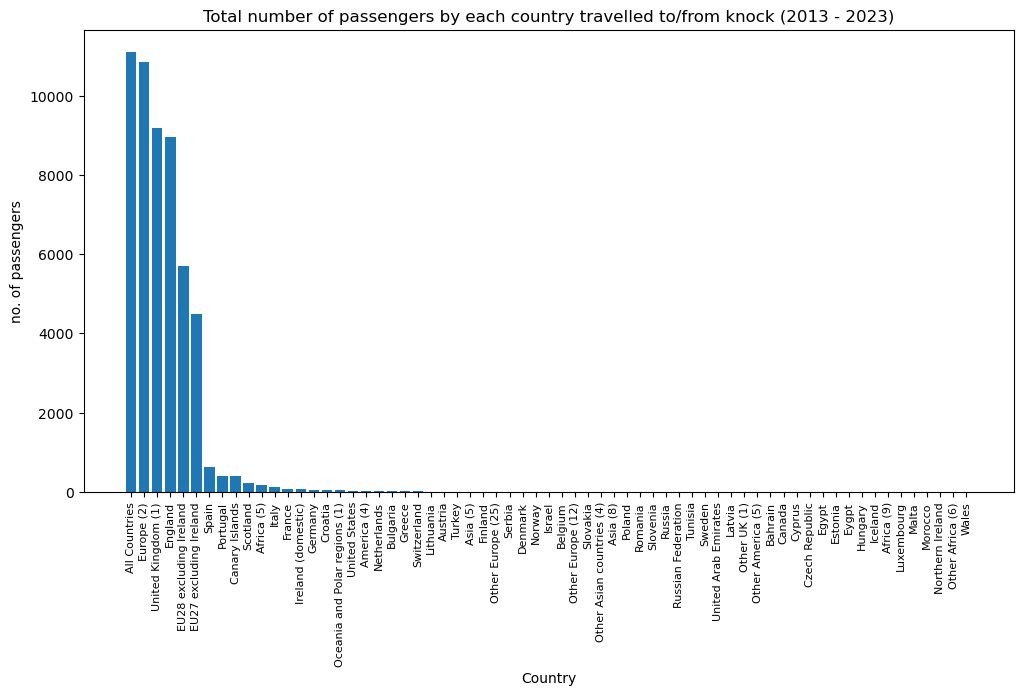

In [42]:
#plotting a bar chart for the passenger count by country travelled to/from knock airport
plt.figure(figsize=(12,6))
plt.bar(knock['Country'], knock['passengers'])
plt.xticks(rotation=90,fontsize = 8) 
plt.xlabel("Country")
plt.ylabel("no. of passengers")
plt.title("Total number of passengers by each country travelled to/from knock (2013 - 2023)")
plt.show()

Since these 0 values are expected due to the nature of the dataset, I will leave them in.

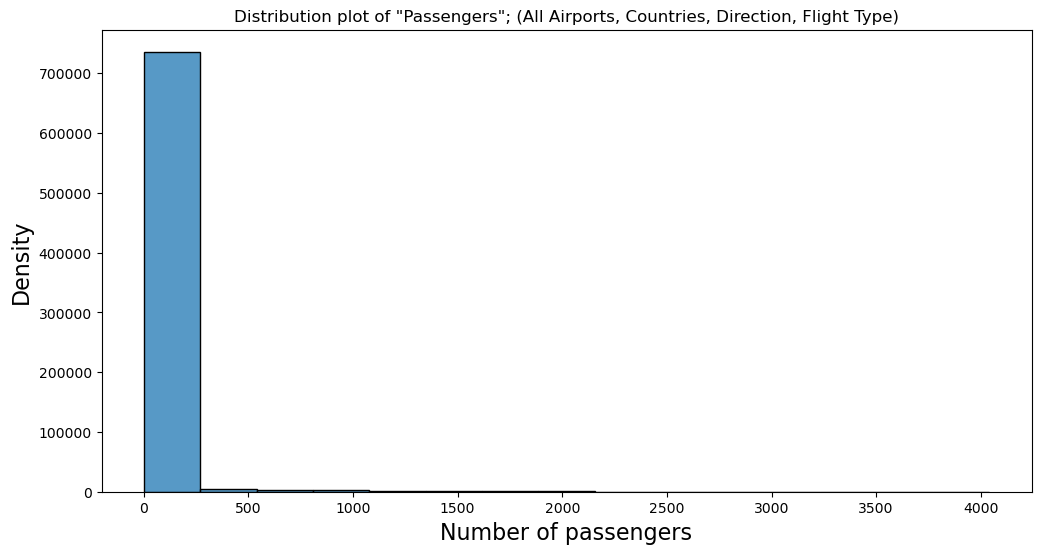

In [43]:
plt.figure(figsize=(12,6))
sns.histplot(airtraffic_df['passengers'],bins=15)
plt.title('Distribution plot of "Passengers"; (All Airports, Countries, Direction, Flight Type)')
plt.xlabel("Number of passengers",fontsize=16)
plt.ylabel("Density",fontsize=16)
plt.show()

Plotting distribution for All airports, directions, country and flight type:

### 3.3.4 creating aggregated dataframe corresponding to All airports, Country, Direction and Flight Type:

In [44]:
#creating a dataframe containing data for all airports, country, direction and flight type
airtraffic_df_ALL = airtraffic_df[(airtraffic_df['Airports in Ireland'].str.contains('All'))&
                                  (airtraffic_df['Country'].str.contains('All'))&
                                  (airtraffic_df['Direction'].str.contains('All'))&
                                  (airtraffic_df['Flight Type'].str.contains('All'))]

In [45]:
airtraffic_df_ALL.head()

,Month,Airports in Ireland,Country,Direction,Flight Type,passengers,freight,commercial_flights
0,2005M01,All main airports,All Countries,All directions,All flights,1548.1,5.6,17.3
1,2005M02,All main airports,All Countries,All directions,All flights,1586.4,6.1,16.5
2,2005M03,All main airports,All Countries,All directions,All flights,1914.3,6.5,18.6
3,2005M04,All main airports,All Countries,All directions,All flights,1878.0,6.0,18.9
4,2005M05,All main airports,All Countries,All directions,All flights,2267.3,6.0,22.2


In [46]:
airtraffic_df_ALL.describe()

,passengers,freight,commercial_flights
count,219.000000,219.000000,219.000000
mean,2260.473973,11.607306,18.711416
std,831.448236,1.767531,5.278910
min,25.300000,5.600000,1.900000
25%,1851.650000,10.600000,16.550000
50%,2328.400000,11.700000,19.300000
75%,2778.000000,12.800000,22.300000
max,4040.600000,18.500000,26.800000


### 3.3.5 Plotting distributions and boxplots of aggregated dataframe

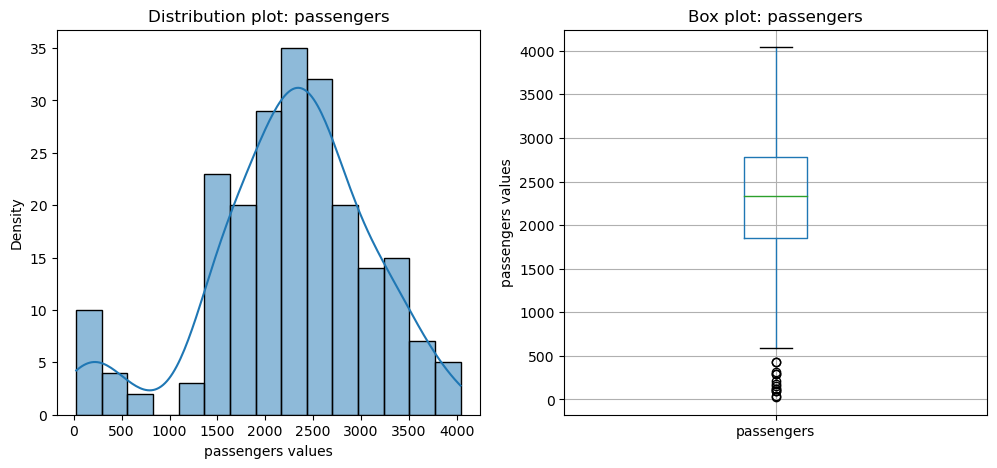

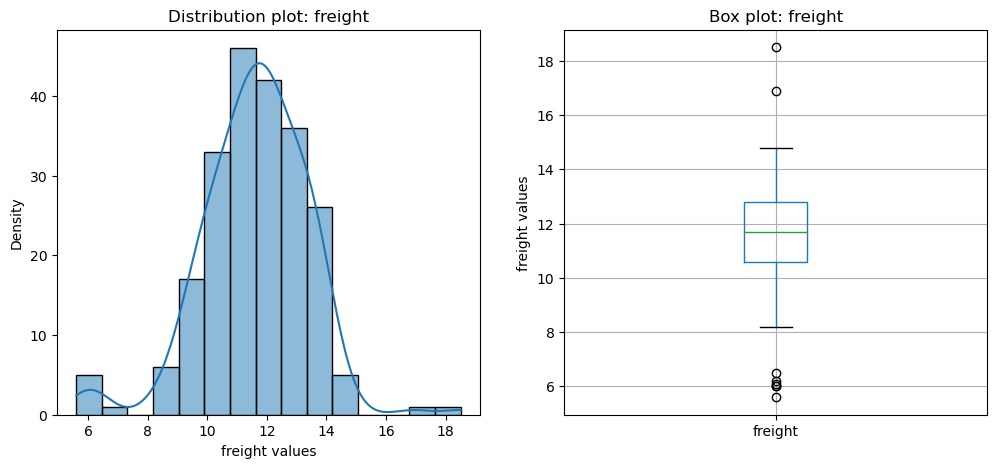

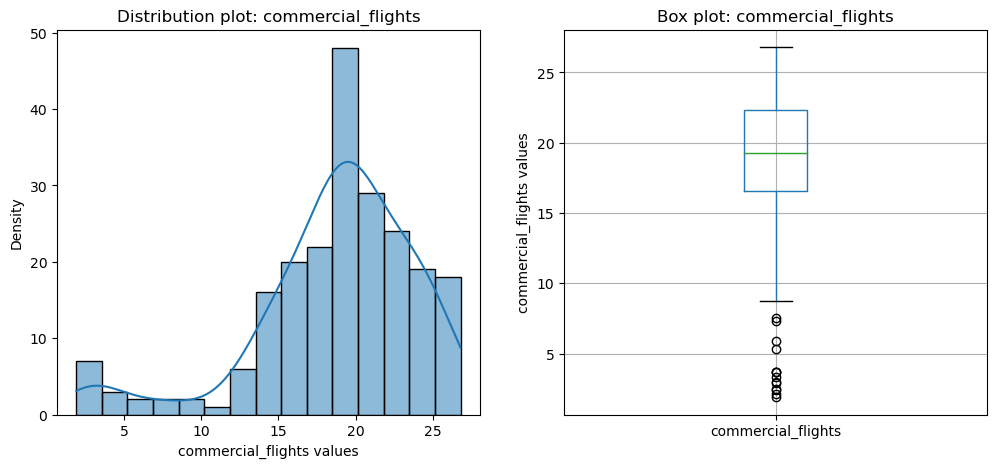

In [47]:
for column in ['passengers','freight','commercial_flights']:
    #creating two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    #plotting histogram
    sns.histplot(airtraffic_df_ALL[column],bins=15,kde=True,ax=ax1)
    ax1.set_title(f'Distribution plot: {column}')
    ax1.set_xlabel(f"{column} values",fontsize=10)
    ax1.set_ylabel("Density",fontsize=10)

    #plotting box plot
    #sns.boxplot(x='Airports in Ireland',y='passengers',data = airtraffic_df_ALL,ax=ax2)
    airtraffic_df_ALL.boxplot(column=column,ax=ax2)
    ax2.set_title(f'Box plot: {column}')
    ax2.set_ylabel(f'{column} values')


**choice of visualizations:**

The histplots and boxplots above provide useful visualizations into the desciptive statistic of the dataset such as measures of central tendency (mean, median and mode). As well as this they provide useful insight into how the data is distributed i.e does it possess characteristics of a Gaussian distribution, or is it skewed.

### 3.3.6 plotting the numerical values against the date:

In [48]:
## setting the ticks as every 6 months
# this was done to spread out the amount of ticks on the xaxis label
month_ticks = []
for i,n in enumerate(airtraffic_df_ALL['Month']):
    if (i+1)%6 == 0:
        month_ticks.append(n)

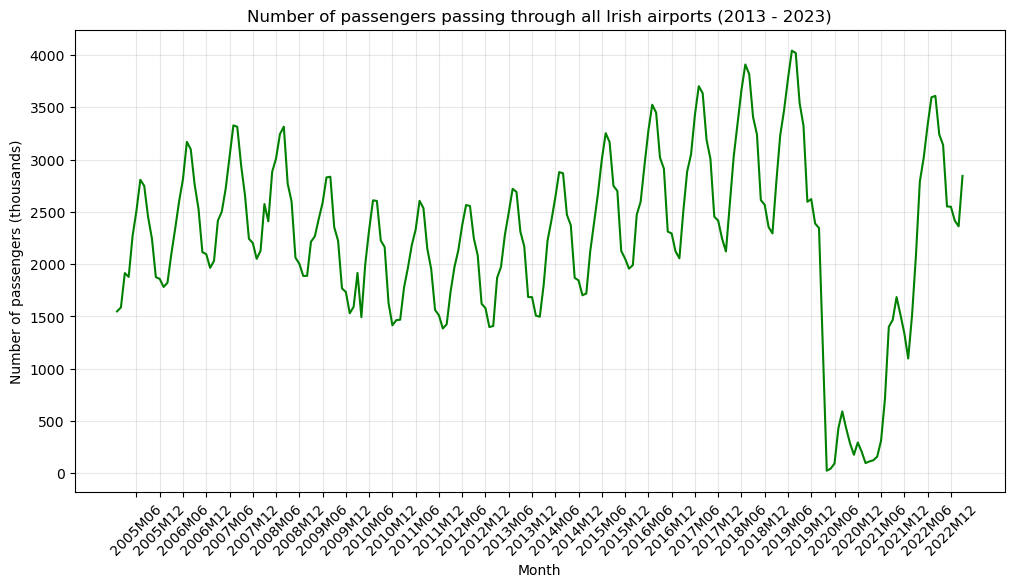

In [49]:
#plotting passenger numbers over time using lineplot

plt.figure(figsize=(12,6))
sns.lineplot(data=airtraffic_df_ALL,x = 'Month', y = 'passengers',color='green')

plt.xticks(month_ticks,rotation=45,fontsize=10)
plt.yticks(fontsize=10)
plt.grid(alpha=.3)

plt.xlabel('Month')
plt.ylabel('Number of passengers (thousands)')
plt.title('Number of passengers passing through all Irish airports (2013 - 2023)')
plt.show()

**observations:** 
- Interesting to see how the passenger numbers fluctuates throughout each year, hitting a clear peak during the middle of year (indicative of peak travel times during summer holidays). 
- From 2013 to the end of 2019, it can be observed that there is a steady increase in the max (peak) and min (trough) passenger numbers year on year. 
- The impact of the COVID-19 pandemic on the passenger numbers is very obvious from this plot as the passenger numbers appear to plummet at the beginning of 2020. 
- Numbers dont appear to have fully returned to pre-pandemic values but have shown a significant increase over the last 2 years.

**Choice of visualization:**
- Since the data I am dealing with is time series (i.e a sequence of data points indexed in time order) a line plot, using the searborn library will be chosen to get a basic understanding of the individual numerical columns (Passenger, freight, commercial_flights).Line plots are typically chosen for this analysis as they are the best at showing the evolution of time series data over time. (ref: https://towardsdatascience.com/5-types-of-plots-that-will-help-you-with-time-series-analysis-b63747818705#:~:text=A%20time%20plot%20is%20basically,plot%20method%20of%20a%20pd.)<br>

- This choice of chart is in line with Tuftes principle: the number of information carrying (variable) dimensions depicted should not exceed the number of dimensions in the data. Thus, showing the passenger/freight/flight numbers plotted against the date is the most effective way at displaying the trend in these numerical values 
- green was chosen as the colour for these plots as this is indicative of Irish data. This will help distinguish between similar plots created for other countries later.

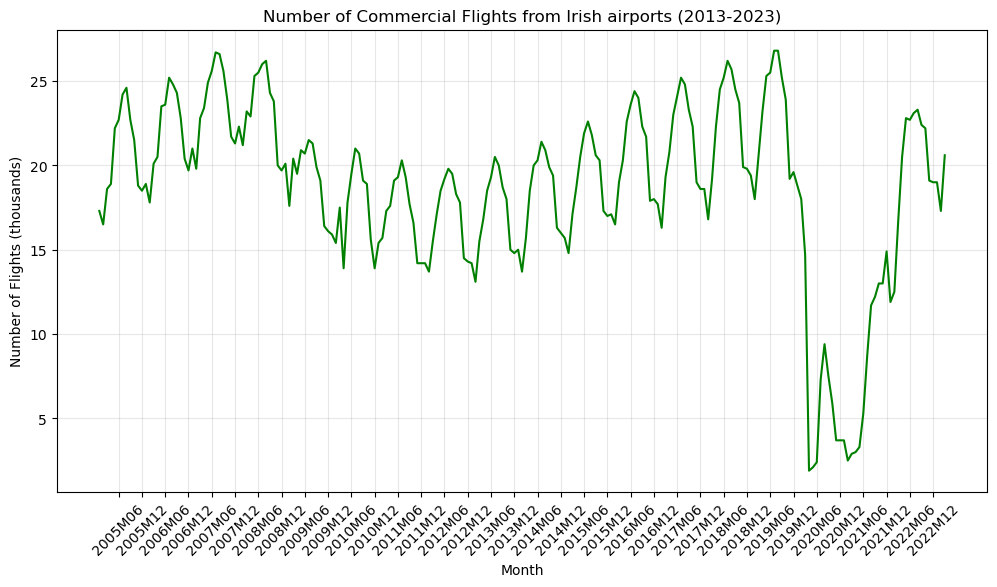

In [50]:
#plotting number of commercial flights over time using lineplot

plt.figure(figsize=(12,6))
sns.lineplot(data=airtraffic_df_ALL,x = 'Month', y = 'commercial_flights',color='green')

plt.xticks(month_ticks,rotation=45,fontsize=10)
plt.yticks(fontsize=10)
plt.grid(alpha=.3)

plt.xlabel('Month')
plt.ylabel('Number of Flights (thousands)')
plt.title('Number of Commercial Flights from Irish airports (2013-2023)')
plt.show()

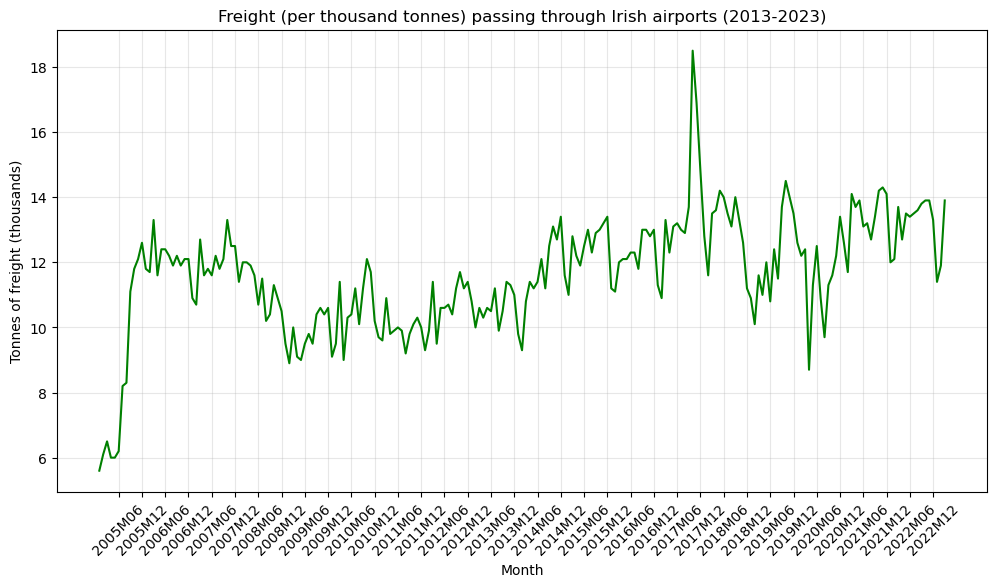

In [51]:
#plotting freight (thousands of tonnes) over time using lineplot

plt.figure(figsize=(12,6))
sns.lineplot(data=airtraffic_df_ALL,x = 'Month', y = 'freight',color='green')

plt.xticks(month_ticks,rotation=45,fontsize=10)
plt.yticks(fontsize=10)
plt.grid(alpha=.3)

plt.xlabel('Month')
plt.ylabel('Tonnes of freight (thousands)')
plt.title('Freight (per thousand tonnes) passing through Irish airports (2013-2023)')
plt.show()

**observations:**
- The freight data does not appear to follow the same clear intervals as the passenger or commercial flights data.
- The pandemic doesnt appear to have much of an impact on the volume of freight passing through the airports. Although there is a sudden drop at the start of 2020, but this immediately rebounds.

### 3.3.7 box plots of each numerical value for each airport

In [52]:
#for the box plot I will remove the aggregated values "All main airports", so i can look at the individual airports
box_df = airtraffic_df[airtraffic_df['Airports in Ireland']!='All main airports']
box_df = box_df[box_df['passengers']>0]

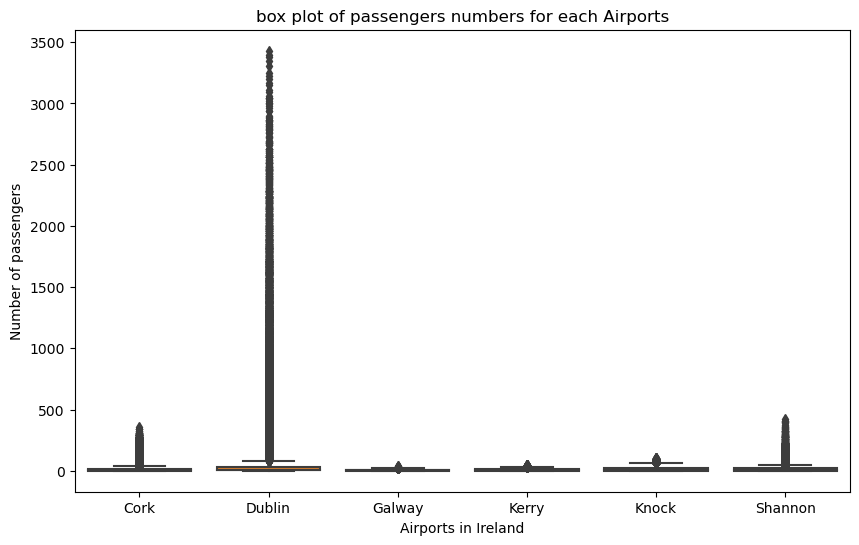

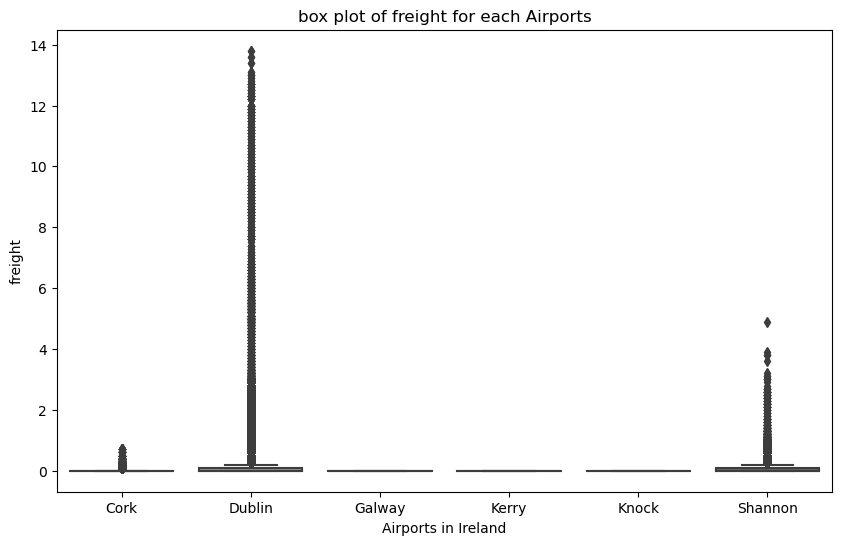

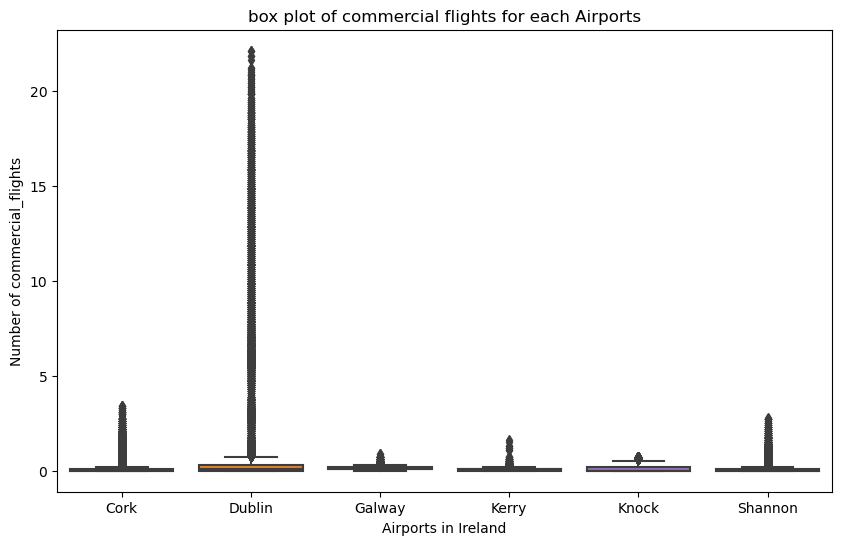

In [53]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Airports in Ireland',y='passengers',data = box_df)
plt.title('box plot of passengers numbers for each Airports')
plt.ylabel('Number of passengers')
plt.show();

plt.figure(figsize=(10,6))
sns.boxplot(x='Airports in Ireland',y='freight',data = box_df)
plt.title('box plot of freight for each Airports')
plt.ylabel('freight')
plt.show();

plt.figure(figsize=(10,6))
sns.boxplot(x='Airports in Ireland',y='commercial_flights',data = box_df)
plt.title('box plot of commercial flights for each Airports')
plt.ylabel('Number of commercial_flights')
plt.show();

# Section 4 -  Data Manipulation
The next few cells I will be conducting some manipulation on the dataset to be used for modelling and further analysis:

In [54]:
#To aid with the modelling later on, I will split up the "Month" column into its contituent year and month values
airtraffic_df['Year'] = airtraffic_df['Month'].str[:4]
airtraffic_df['Month'] = airtraffic_df['Month'].str[4:]

In [55]:
##reformatting columns
#creating a dictionary to map each of the month values to more appropriate values
month_dict = {'M01':'1','M02':'2','M03':'3','M04':'4','M05':'5','M06':'6',
              'M07':'7','M08':'8','M09':'9','M10':'10','M11':'11','M12':'12' }

#using the .map method to apply the values of the above dictionary to the column
airtraffic_df['Month'] = airtraffic_df['Month'].map(month_dict)

In [56]:
#renaming these two columns to names that are easier to work with
airtraffic_df.rename(columns={'Airports in Ireland':'airport', 'Flight Type':'type'}, inplace=True)

#to keep column names consistent, I am going to ensure they are all lower case
airtraffic_df.columns = map(str.lower, airtraffic_df.columns)

In [57]:
#reordering the columns to ensure that year and month are the first two columns,#
#This improves readability of the table
airtraffic_df = airtraffic_df[['year','month','airport','country','direction',
                               'type','passengers','freight','commercial_flights']]

In [58]:
#converting numerical values to actual values (i.e they are currently represented in units of thousands)
airtraffic_df['passengers'] = airtraffic_df['passengers']*1000
airtraffic_df['freight'] = airtraffic_df['freight']*1000
airtraffic_df['commercial_flights'] = airtraffic_df['commercial_flights']*1000

#### making sure theres data for every year for each airport:

In [59]:
for airport in airtraffic_df['airport'].unique():
    unique_years = airtraffic_df[airtraffic_df['airport']==airport]['year'].unique()
    print(f'{airport}: {unique_years}\n')

All main airports: ['2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014'
 '2015' '2016' '2017' '2018' '2019' '2020' '2021' '2022' '2023']

Cork: ['2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014'
 '2015' '2016' '2017' '2018' '2019' '2020' '2021' '2022' '2023']

Dublin: ['2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014'
 '2015' '2016' '2017' '2018' '2019' '2020' '2021' '2022' '2023']

Galway: ['2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012']

Kerry: ['2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014'
 '2015' '2016' '2017' '2018' '2019' '2020' '2021' '2022' '2023']

Knock: ['2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014'
 '2015' '2016' '2017' '2018' '2019' '2020' '2021' '2022' '2023']

Shannon: ['2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014'
 '2015' '2016' '2017' '2018' '2019' '2020' '2021' '2022' '2023']



### 4.1 removing Galway airport and reaggregating the dataset

- we see from the above that Galway is missing data for after 2012. This is because Galway airport ceased all commercial air traffic in 2013.
- Ref: https://www.galwaybeo.ie/news/history/galway-airport-closed-untimely-story-5839291
- For the purpose of this project,  I will ignore all data for Galway airport

In [60]:
#removing Galway airport as it is incomplete from the year range in the dataset; We are only interested in the 5 main
#airports for the purpose of this study
airtraffic_df = airtraffic_df[airtraffic_df['airport']!='Galway']

creating a new aggregated data frame, since airtraffic_df_ALL contains data relating to Galway airport.<br>
To do this I will select from the dataset where country=ALl, direction=All, type=All, but not include where airport=All.<br>
This way I can sum by each remaining airport, to get the new aggregated dataframe.<br>

In [61]:
#selecting the relevant data from the dataset, as outline in above markdown
airtraffic_agg = airtraffic_df[(~airtraffic_df['airport'].str.contains('All')) &
                                 (airtraffic_df['country'].str.contains('All') ) &
                                 (airtraffic_df['direction'].str.contains('All') ) &
                                 (airtraffic_df['type'].str.contains('All') )]

#now I have data selected, I can drop the 4 non-numerical columns
airtraffic_agg = airtraffic_agg.drop(columns = ['airport','country','direction','type'])

#summing each numerical column by year and month
airtraffic_agg = airtraffic_agg.groupby(['year','month'])[['passengers','freight','commercial_flights']].sum()

#reseting the index 
airtraffic_agg = airtraffic_agg.reset_index()

Removing the aggregated values from the original dataset.<br>
This is done to ensure all these values are specific to their associated categorical columns (ie airport/country) and arent aggregated

In [62]:
#removing the unwanted values from the unaggregated dataframe
airtraffic_df = airtraffic_df[ (~airtraffic_df['airport'].str.contains('All')) &
                               (~airtraffic_df['country'].str.contains('All')) &
                               (~airtraffic_df['direction'].str.contains('All')) & 
                               (~airtraffic_df['type'].str.contains('All'))]

In [63]:
#resetting index after removing values
airtraffic_df = airtraffic_df.reset_index().drop(columns = 'index')

#taking a look at the updated dataframe
airtraffic_df.head()

,year,month,airport,country,direction,type,passengers,freight,commercial_flights
0,2005,1,Cork,Ireland (domestic),Arrival,Scheduled,7700.0,100.0,200.0
1,2005,2,Cork,Ireland (domestic),Arrival,Scheduled,8900.0,100.0,200.0
2,2005,3,Cork,Ireland (domestic),Arrival,Scheduled,8700.0,100.0,200.0
3,2005,4,Cork,Ireland (domestic),Arrival,Scheduled,9400.0,0.0,200.0
4,2005,5,Cork,Ireland (domestic),Arrival,Scheduled,9400.0,0.0,300.0


### 4.2 Evaluating "Country" column

#### In this part of the data manipulation process I want to take a look into the "country" column
I will create a temporary additional column called "region" to split these countries up based on their geographical region. This region is based off the country/region dictionary provide by https://www.ucl.ac.uk/global/regional-activity/countries-and-regions-directory. This will enable me to look break this column down to a more manageable scale.

In [64]:
#taking a look at the unique country values
airtraffic_df['country'].unique()

array(['Ireland (domestic)', 'Europe (2)', 'EU27 excluding Ireland',
       'Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Czech Republic',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta',
       'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia',
       'Slovenia', 'Spain', 'Sweden', 'United Kingdom (1)', 'England',
       'Northern Ireland', 'Scotland', 'Wales', 'Other UK (1)', 'Croatia',
       'Iceland', 'Norway', 'Russian Federation', 'Serbia', 'Switzerland',
       'Other Europe (12)', 'America (4)', 'Canada', 'United States',
       'Other America (5)', 'Africa (5)', 'Canary Islands', 'Eygpt',
       'Morocco', 'Tunisia', 'Other Africa (6)', 'Asia (5)', 'Bahrain',
       'Israel', 'Turkey', 'United Arab Emirates',
       'Other Asian countries (4)', 'Oceania and Polar regions (1)',
       'EU28 excluding Ireland', 'Russia', 'Other Europe (25)',
       'Africa (9)', 'Egypt', 'Asia

In [65]:
##creating a dictionary, mapping eaech country to their geographical region
#note: Ireland will be assigned as domestic, and Europe will be further split up into continental and other (island nations)
country_dict={'Domestic':'Ireland (domestic)',
              'Europe (continental)':['Europe (2)','EU27 excluding Ireland', 'EU28 excluding Ireland','Austria', 'Belgium', 'Bulgaria', 'Croatia',
                                       'Cyprus','Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
                                       'Germany', 'Greece', 'Hungary', 'Italy', 'Latvia', 'Lithuania',
                                       'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal',
                                       'Romania', 'Slovakia', 'Slovenia', 'Spain',
                                       'Sweden', 'Norway', 'Russia','Other Europe (12)',
                                       'Serbia', 'Switzerland','Turkey'],
              'North America': ['America (4)', 'Canada', 'United States', 'Other America (5)'],
              'United Kingdom':['England', 'Northern Ireland','Scotland', 'Wales','Other UK (1)'],
              'Europe (other)':['Iceland','Canary Islands','Other Europe (25)'],
              'Africa':['Africa (5)','Africa (9)', 'Egypt', 'Morocco', 'Tunisia', 'Other Africa (6)'],
              'Middle East':['Bahrain', 'Israel', 'United Arab Emirates'],
              'Asia':['Asia (5)','Asia (8)', 'Other Asian countries (4)'],
              'Other':'Oceania and Polar regions (1)',
             }

In [66]:
#creating function to get the associated key with any value that is checked against the above dictionary
# i.e if I enter get_keys(country_dict,'Spain'), Europe (continental) should be returned

def get_keys(country_dict,country):
    for key,values in country_dict.items():
        if country in values:
            return key
            break

In [67]:
#applying above function to each country and updating new column region with returned value
airtraffic_df['region'] = airtraffic_df['country'].apply(lambda x:get_keys(country_dict,x))

In [68]:
#taking a look at some of the data
airtraffic_df[(airtraffic_df['region']=='Africa')&(airtraffic_df['year']=='2023')&(airtraffic_df['airport']=='Dublin') &
              (airtraffic_df['direction']=='Arrival')&(airtraffic_df['month']=='1')]

,year,month,airport,country,direction,type,passengers,freight,commercial_flights,region
250980,2023,1,Dublin,Africa (9),Arrival,Scheduled,5500.0,0.0,0.0,Africa
250981,2023,1,Dublin,Africa (9),Arrival,Unscheduled,0.0,0.0,0.0,Africa
250984,2023,1,Dublin,Egypt,Arrival,Scheduled,2000.0,0.0,0.0,Africa
250985,2023,1,Dublin,Egypt,Arrival,Unscheduled,0.0,0.0,0.0,Africa
250988,2023,1,Dublin,Morocco,Arrival,Scheduled,3500.0,0.0,0.0,Africa
250989,2023,1,Dublin,Morocco,Arrival,Unscheduled,0.0,0.0,0.0,Africa
250992,2023,1,Dublin,Tunisia,Arrival,Scheduled,0.0,0.0,0.0,Africa
250993,2023,1,Dublin,Tunisia,Arrival,Unscheduled,0.0,0.0,0.0,Africa
250996,2023,1,Dublin,Other Africa (6),Arrival,Scheduled,0.0,0.0,0.0,Africa
250997,2023,1,Dublin,Other Africa (6),Arrival,Unscheduled,0.0,0.0,0.0,Africa


In [69]:
#taking a look at some of the data
airtraffic_df[(airtraffic_df['region']=='North America')&(airtraffic_df['year']=='2023')&(airtraffic_df['airport']=='Dublin') &
              (airtraffic_df['direction']=='Arrival')&(airtraffic_df['month']=='1')]

,year,month,airport,country,direction,type,passengers,freight,commercial_flights,region
250964,2023,1,Dublin,America (4),Arrival,Scheduled,87000.0,1400.0,500.0,North America
250965,2023,1,Dublin,America (4),Arrival,Unscheduled,700.0,0.0,0.0,North America
250968,2023,1,Dublin,Canada,Arrival,Scheduled,9300.0,100.0,100.0,North America
250969,2023,1,Dublin,Canada,Arrival,Unscheduled,0.0,0.0,0.0,North America
250972,2023,1,Dublin,United States,Arrival,Scheduled,77700.0,1200.0,400.0,North America
250973,2023,1,Dublin,United States,Arrival,Unscheduled,700.0,0.0,0.0,North America
250976,2023,1,Dublin,Other America (5),Arrival,Scheduled,0.0,0.0,0.0,North America
250977,2023,1,Dublin,Other America (5),Arrival,Unscheduled,0.0,0.0,0.0,North America


**Note**: It can be observed from the dataframe that the rows with the following country values are aggregated (i.e summed) amounts of all other countries from that region:
- United Kingdom (1)
- Europe (2)
- EU27 excluding Ireland
- America (4)
- Africa (9)
- Asia (8)

These rows will now be removed, so that there is no aggregated values present in this dataframe:

In [70]:
#defining list of countries that will be removed from the dataframe
remove_list = ['United Kingdom (1)','Europe (2)','America (4)','Africa (9)','Asia (8)','EU27 excluding Ireland',
               'EU28 excluding Ireland','Africa (5)','Asia (5)']

#selecting from the dataframe where country not in the above list
airtraffic_df = airtraffic_df[~airtraffic_df['country'].isin(remove_list)]

### 4.3 creating some visualiztions with the region column

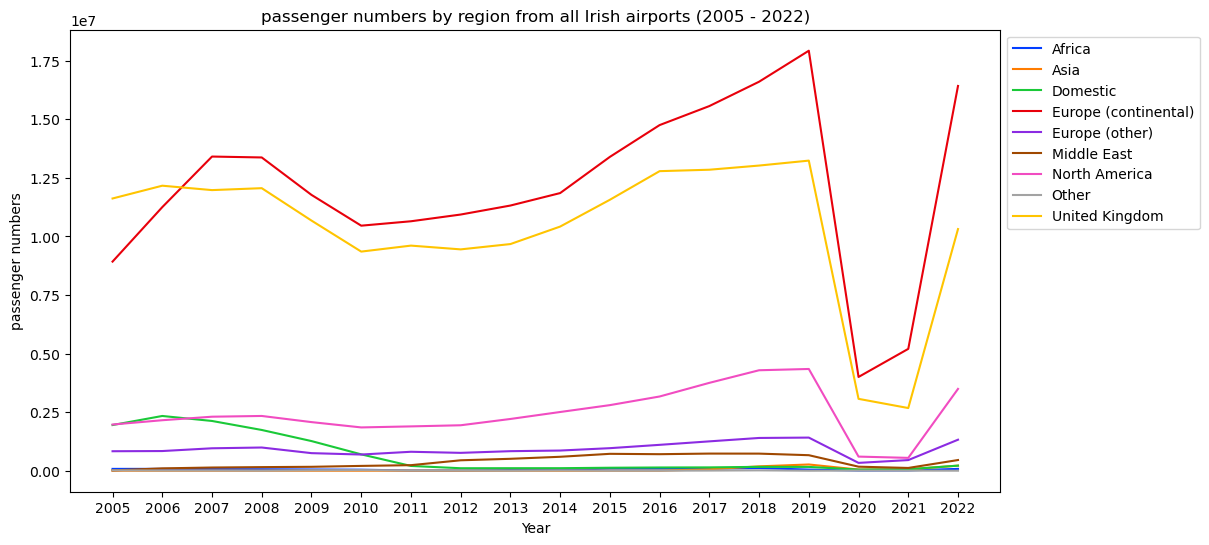

In [71]:
#summing by region for each airport/year
region_df = airtraffic_df.groupby(['year','region'])[['passengers',
                                                      'freight',
                                                      'commercial_flights']].sum().reset_index()

#removing 2023 data from the dataframe this is only accounting for up until March
region_df = region_df[region_df['year']!='2023']

#reordering 

#plotting a line plot to see the trend in passengers numbers for each year by region
plt.figure(figsize =(12,6))
sns.lineplot(x='year',y='passengers',hue='region',data=region_df, palette=sns.color_palette('bright', n_colors=9))
plt.legend(fontsize=10,loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Year')
plt.ylabel('passenger numbers')
plt.title('passenger numbers by region from all Irish airports (2005 - 2022)');

**Choice of Visualization:**

- I chose a multi-line plot for this visualization to be in line with Tuftes principles of showing the data while minimizing the data-ink ratio.
- The visualization uses clear labels and a contrasting colour scheme for clarity.
- No data in the above visualization is quoted out of context and the number of information carrying dimensions does not exceed the dimensions in the data.


**Observations:**
- It is clear from the above plot that Continental Europe is the most popular route from Irish airports across every year since 2007, where before this the UK was the most popular route.
- There appears to be a major drop off in domestic air travel in Ireland from 2007-2011 (interestingly coinciding with the economic downturn of the time). This appears to have never recovered from this drop off as it remains low.

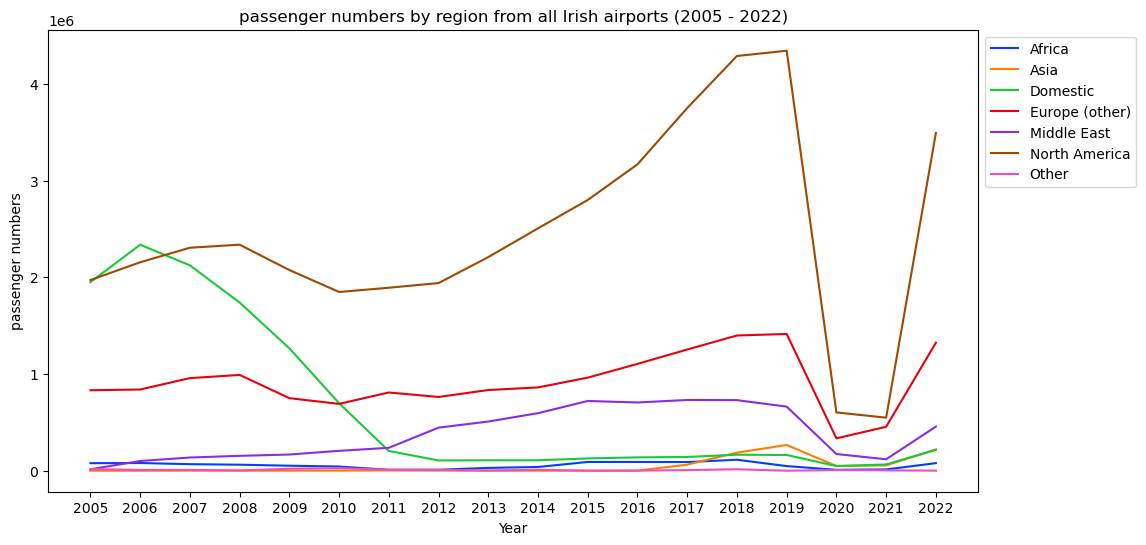

In [72]:
#removing the United Kingdom and Europe (Continental)
region_df = region_df[~region_df['region'].isin(['Europe (continental)','United Kingdom'])]

#plotting a line plot to see the trend in passengers numbers for each year by region
plt.figure(figsize =(12,6))
sns.lineplot(x='year',y='passengers',hue='region',data=region_df, palette=sns.color_palette('bright', n_colors=7))
plt.legend(fontsize=10,loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Year')
plt.ylabel('passenger numbers')
plt.title('passenger numbers by region from all Irish airports (2005 - 2022)');

### 4.4 Taking a look at the passenger numbers by seasons 

According to the met office: the seasons are defined as spring (March, April, May), summer (June, July, August), autumn (September, October, November) and winter (December, January, February).

In [73]:
#creating a dictionary to map each month to a Season
season_map={'1':'Winter',
            '2':'Winter',
            '3':'Spring',
            '4':'Spring',
            '5':'Spring',
            '6':'Summer',
            '7':'Summer',
            '8':'Summer',
            '9':'Autumn',
            '10':'Autumn',
            '11':'Autumn',
            '12':'Winter'}
  
#updating the season column using the dictionary above    
airtraffic_df['season']=airtraffic_df['month'].map(season_map)

In [74]:
airtraffic_df.head()

,year,month,airport,country,direction,type,passengers,freight,commercial_flights,region,season
0,2005,1,Cork,Ireland (domestic),Arrival,Scheduled,7700.0,100.0,200.0,Domestic,Winter
1,2005,2,Cork,Ireland (domestic),Arrival,Scheduled,8900.0,100.0,200.0,Domestic,Winter
2,2005,3,Cork,Ireland (domestic),Arrival,Scheduled,8700.0,100.0,200.0,Domestic,Spring
3,2005,4,Cork,Ireland (domestic),Arrival,Scheduled,9400.0,0.0,200.0,Domestic,Spring
4,2005,5,Cork,Ireland (domestic),Arrival,Scheduled,9400.0,0.0,300.0,Domestic,Spring


### 4.5 creating some visualizations around the seasonal passenger numbers

In [75]:
#getting the number of passengers flying from all irish airports for each season of the year
season_df = airtraffic_df.groupby(['year','season'])['passengers'].sum().reset_index()

In [76]:
#getting proportions of passengers travelling each season
tot_passengers = season_df.groupby('year')['passengers'].sum().reset_index()

In [77]:
#adding the total number of passengers for each airport as a column
season_df = season_df.merge(tot_passengers,on='year',how='left')

In [78]:
#renaming columns after merge
season_df = season_df.rename(columns = {'passengers_x':'passengers','passengers_y':'total_per_airport'})

In [79]:
#calculating proportions
season_df['proportion'] = season_df['passengers']/season_df['total_per_airport']

season_df.head()

,year,season,passengers,total_per_airport,proportion
0,2005,Autumn,6502700.0,25425300.0,0.255757
1,2005,Spring,5997800.0,25425300.0,0.235899
2,2005,Summer,7979600.0,25425300.0,0.313845
3,2005,Winter,4945200.0,25425300.0,0.194499
4,2006,Autumn,7342900.0,28977300.0,0.253402


In [80]:
#pivoting the table to enable grouped bar chart plot
season_df = season_df.pivot(index='year',columns='season',values='proportion')
season_df = season_df.reset_index()

In [81]:
#removing data for 2023 as data is only included up until march
season_df = season_df[season_df['year']!='2023']

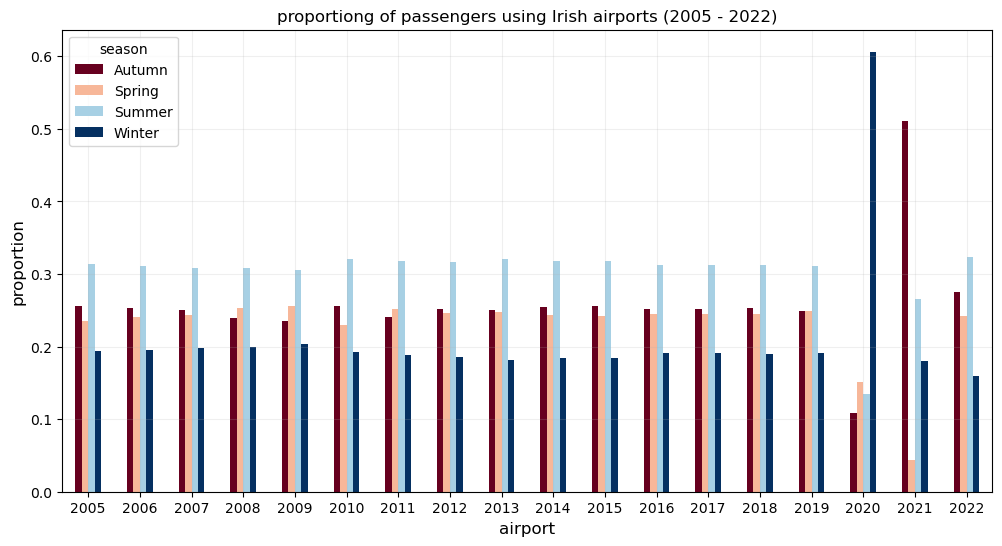

In [82]:
#plotting a grouped bar chart to display breakdown of seasonal passenger numbers from 2005-2023
plt.figure(figsize=(12,6))
season_df.plot(x='year',kind='bar', stacked=False, ax = plt.gca(),colormap='RdBu')
plt.title('proportiong of passengers using Irish airports (2005 - 2022)')
plt.ylabel('proportion',size=12)
plt.xlabel('airport',size=12)
plt.xticks(rotation=0)
plt.grid(True,alpha=.2)
plt.show()

**Choice of visualization:**
- A grouped bar chart was chosen to display the passenger proportions by each season as this is the most effective way at displaying and comparing different proportions. Using this type of chart it is very clear to see which season has the dominent passenger numbers for each year in the dataset
- This is in line with Tuftes principles as it allows viewers to effectively compare and contrast different aspects of the data.
- The chart also uses clear labels and contrasting color scheme for clarity.

**Obervations:**
- The above chart shows a clear trend in the seasonality of air traffic passenger numbers for each year. Summer proves to be the most popular month for air travel in Ireland for every year excluding 2020 and 2021.
- The covid years (2020/2021) show a clear anomoly in the data as passenger volumes were severely altered due to imposed travel restrictions.

#### looking at seasonal passenger numbers for each airport in 2023:

In [83]:
#looking specifically at last year (2022)
season_df = airtraffic_df[airtraffic_df['year']=='2022']

In [84]:
#summing by season for each airport
season_df = season_df.groupby(['airport','season'])['passengers'].sum().reset_index()

In [85]:
#getting proportions of passengers travelling each season for each airport
tot_passengers = season_df.groupby('airport')['passengers'].sum().reset_index()

#adding the total number of passengers for each airport as a column
season_df = season_df.merge(tot_passengers,on='airport',how='left')

#renaming columns after merge
season_df = season_df.rename(columns = {'passengers_x':'passengers','passengers_y':'total_per_airport'})

#calculating proportions
season_df['proportion'] = season_df['passengers']/season_df['total_per_airport']

season_df.head()

,airport,season,passengers,total_per_airport,proportion
0,Cork,Autumn,605200.0,2238500.0,0.270360
1,Cork,Spring,522400.0,2238500.0,0.233371
2,Cork,Summer,784100.0,2238500.0,0.350279
3,Cork,Winter,326800.0,2238500.0,0.145991
4,Dublin,Autumn,7640900.0,27794600.0,0.274906


In [86]:
#pivoting the table to enable grouped bar chart plot
season_df = season_df.pivot(index='airport',columns='season',values='proportion')
season_df = season_df.reset_index()

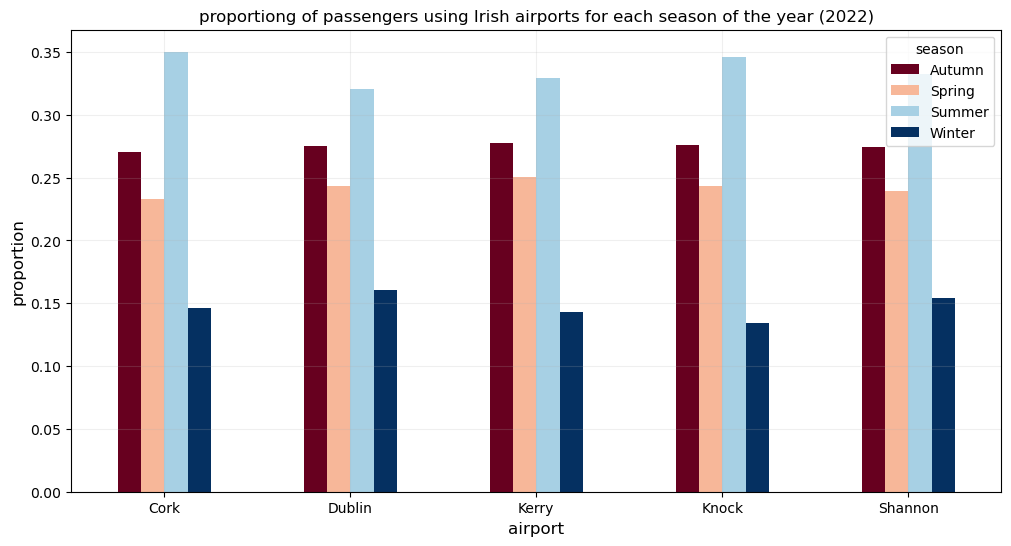

In [87]:
#plotting a grouped bar chart to display breakdown of seasonal passengers numbers for each Irish airport in 2022
plt.figure(figsize=(12,6))
season_df.plot(x='airport',kind='bar', stacked=False, ax = plt.gca(),colormap='RdBu')
plt.title('proportiong of passengers using Irish airports for each season of the year (2022)')
plt.ylabel('proportion',size=12)
plt.xlabel('airport',size=12)
plt.xticks(rotation=0)
plt.grid(True,alpha=.2)
plt.show()

**Observations:**
- There appears to be very little change in the seasonal trend of air travel across all 5 Irish airports from 2022.
- Each airport observes the highest volumn of passenger numbers during the summer months and the lowest during Winter.

## Section 5 - Saving the airtraffic_df and airtraffic_agg dataframes to csv to be loaded in to other notebooks:

In [82]:
airtraffic_df.to_csv('ireland_airtraffic.csv',index=False)

In [83]:
airtraffic_agg.to_csv('ireland_airtraffic_agg.csv',index=False)

## Section 6 -  Loading in the airport passenger and freight data for Norway :

source:
- https://www.ssb.no/en/statbank/table/08507/
- https://www.ssb.no/en/statbank/table/08505/

In [88]:
##using the pd.read_excel pandas methdo to load in the data since it is provided as a spreadsheet from the source
Norway_passenger = pd.read_excel('Norway_passengers_data_2009_2023.xlsx')
Norway_freight = pd.read_excel('Norway_freight_data_2009_2023.xlsx')

In [85]:
#taking a look at the passengers data
Norway_passenger.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,2009M01,2009M02,2009M03,2009M04,2009M05,2009M06,...,2023M01,2023M02,2023M03,2023M04,2023M05,2023M06,2023M07,2023M08,2023M09,2023M10
0,Scheduled passenger flights,Domestic flights,Passengers on board at arrival,Oslo Gardermoen,304246,319031,374133,351455,377470,418489,...,375708,380684,469457,409708,459692,522495,421910,467800,500798,499204
1,Scheduled passenger flights,Domestic flights,Passengers on board at arrival,Stavanger Sola,80444,81222,100317,89520,93720,100719,...,78355,75955,99755,86358,101604,103407,71044,88090,105982,104754
2,Scheduled passenger flights,Domestic flights,Passengers on board at arrival,Bergen Flesland,126913,130037,154087,140025,152551,157827,...,143798,139207,173191,157690,183847,184295,148564,179292,187819,188439
3,Scheduled passenger flights,Domestic flights,Passengers on board at arrival,Trondheim Værnes,103152,110189,128944,118126,121818,127563,...,119546,122051,140505,127838,144208,149423,112490,140498,151054,160292
4,Scheduled passenger flights,Domestic flights,Passengers on board at arrival,Alta,13199,14207,14793,13400,13316,15025,...,12140,11789,15547,13418,15320,16213,17389,17361,15142,15970


In [86]:
#taking a look at the freight data
Norway_freight.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,2009M01,2009M02,2009M03,2009M04,2009M05,2009M06,...,2023M01,2023M02,2023M03,2023M04,2023M05,2023M06,2023M07,2023M08,2023M09,2023M10
0,Scheduled passenger flights,Domestic flights,Arrival,Oslo Gardermoen,202,197,207,186,214,227,...,120,111,140,118,168,192,140,154,149,155
1,Scheduled passenger flights,Domestic flights,Arrival,Stavanger Sola,70,64,70,64,68,73,...,48,46,59,46,56,57,46,54,56,60
2,Scheduled passenger flights,Domestic flights,Arrival,Bergen Flesland,78,73,80,67,77,85,...,79,73,86,70,81,87,72,88,87,82
3,Scheduled passenger flights,Domestic flights,Arrival,Trondheim Værnes,63,65,77,53,57,64,...,50,42,50,42,52,54,45,52,51,51
4,Scheduled passenger flights,Domestic flights,Arrival,Alta,24,20,24,21,20,20,...,11,12,13,11,11,15,12,12,12,13


## 6.1 parsing the Norway data

- I want to restructed these two dataframes so they are formatted the same as airtraffic_df. I want to do this because this will make comparing the datasets a much easier process and reduce the chance of making any mistakes later on.

- To do this I have created the below function that reads in a dataframe and a specified column (i.e passengers/freight)

The function will:
1) rename the columns to match the schema of airtraffic_d
2) define a blank dataframe (norway_new)
3) create a list of the dates in the dataframe passed into the arguments
4) loop through each row in the dataframe passed into arguments (using iterrows), which displays each row as a dictionary of the columns
5) within the above loop, the function will also loop through each date in the list of dates and extract the value from the iterrows dictionary. This value will be concatenated to norway_new along with the type,route,direction,airport and date, for each iteration of the loop.

- The result of this function will be a dataframe containing all the passenger/freight values in the same schema as the Irish data.

In [89]:
def parse_norway_data(dataframe,column):
    
    #renaming columns to match schema
    dataframe = dataframe.rename(columns = {'Unnamed: 0':'type','Unnamed: 1':'route',
                                                        'Unnamed: 2':'direction','Unnamed: 3':'airport'})
    #defining blank dataframe, to be concatented to in each loop
    norway_new = pd.DataFrame()
    #getting a list of all the dates available in the dataframe (i.e [2009M1,2009M02])
    dates = list(dataframe.drop(columns=['type','route','direction','airport']).columns)

    #looping through each row in the dataframe (arguments) using iterrows
    for i,row in dataframe.iterrows():
        #row from iterrows will be a dictionary containing the corresponding values of each column for that specific row
        #using this I can extract the 4 categorical values and save them to a variable
        type_ = row.type
        route = row.route
        direction = row.direction
        airport = row.airport
        
        #looping through each date in the list of dates 
        for date in dates:
            #getting the value of that date
            values = row.loc[date]
            #creating dataframe to be concatenated to norway_new using the categorical values and the numerical value 
            #obtained from the above line
            df_new = pd.DataFrame({'date':[date],'airport':[airport],'type':[type_],
                                   'direction':[direction],'route':[route],column:[values]})
            #concatentating the dataframes
            norway_new = pd.concat([norway_new,df_new])
           
    norway_new = norway_new.reset_index().drop(columns='index')
    return norway_new

In [90]:
#running the function against the freight dataframe
Norway_freight = parse_norway_data(Norway_freight,'freight')

In [91]:
#running the function against the passenger dataframe
Norway_passenger = parse_norway_data(Norway_passenger,'passengers')

## 6.2 performing EDA on Norway datasets

In [99]:
#looking at the updated dataframe for passengers
Norway_passenger.head()

,date,airport,type,direction,route,passengers
0,2009M01,Oslo Gardermoen,Scheduled passenger flights,Passengers on board at arrival,Domestic flights,304246
1,2009M02,Oslo Gardermoen,Scheduled passenger flights,Passengers on board at arrival,Domestic flights,319031
2,2009M03,Oslo Gardermoen,Scheduled passenger flights,Passengers on board at arrival,Domestic flights,374133
3,2009M04,Oslo Gardermoen,Scheduled passenger flights,Passengers on board at arrival,Domestic flights,351455
4,2009M05,Oslo Gardermoen,Scheduled passenger flights,Passengers on board at arrival,Domestic flights,377470


In [100]:
#looking at the updated dataframe for freight
Norway_freight.head()

,date,airport,type,direction,route,freight
0,2009M01,Oslo Gardermoen,Scheduled passenger flights,Arrival,Domestic flights,202
1,2009M02,Oslo Gardermoen,Scheduled passenger flights,Arrival,Domestic flights,197
2,2009M03,Oslo Gardermoen,Scheduled passenger flights,Arrival,Domestic flights,207
3,2009M04,Oslo Gardermoen,Scheduled passenger flights,Arrival,Domestic flights,186
4,2009M05,Oslo Gardermoen,Scheduled passenger flights,Arrival,Domestic flights,214


In [101]:
Norway_freight.describe()

,freight
count,111072.000000
mean,18.157636
std,238.702708
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,9909.000000


In [102]:
Norway_freight.shape

(111072, 6)

In [103]:
Norway_freight.isnull().sum()

date         0
airport      0
type         0
direction    0
route        0
freight      0
dtype: int64

In [104]:
Norway_passenger.describe()

,passengers
count,74048.000000
mean,9601.817038
std,48601.226896
min,0.000000
25%,0.000000
50%,0.000000
75%,1724.000000
max,877327.000000


In [105]:
Norway_passenger.shape

(74048, 6)

In [106]:
Norway_passenger.isnull().sum()

date          0
airport       0
type          0
direction     0
route         0
passengers    0
dtype: int64

In [107]:
#taking a look at the unique airport values
Norway_passenger['airport'].unique()

array(['Oslo Gardermoen', 'Stavanger Sola', 'Bergen Flesland',
       'Trondheim Værnes', 'Alta', 'Andenes Andøya', 'Bardufoss',
       'Berlevåg', 'Bodø', 'Brønnøysund Brønnøy', 'Båtsfjord',
       'Fagernes Leirin', 'Florø', 'Førde Bringeland', 'Hammerfest',
       'Harstad/Narvik Evenes', 'Hasvik', 'Haugesund Karmøy',
       'Honningsvåg Valan', 'Kirkenes Høybuktmoen', 'Kristiansand Kjevik',
       'Kristiansund Kvernberget', 'Lakselv Banak', 'Mehamn',
       'Mo i Rana Røssvold', 'Molde Årø', 'Mosjøen Kjærstad',
       'Moss Rygge', 'Namsos', 'Narvik Framnes', 'Notodden', 'Røros',
       'Rørvik Ryum', 'Røst', 'Sandane Anda', 'Sandefjord Torp',
       'Sandnessjøen Stokka', 'Skien Geitryggen', 'Sogndal Haukåsen',
       'Stokmarknes Skagen', 'Stord Sørstokken', 'Svalbard Longyear',
       'Svolvær Helle', 'Sørkjosen', 'Tromsø Langnes', 'Vadsø',
       'Vardø Svartnes', 'Vestvågøy Leknes', 'Værøy', 'Ørland',
       'Ørsta-Volda Hovden', 'Ålesund Vigra'], dtype=object)

In [108]:
#taking a look at the unique types
Norway_passenger['type'].unique()

array(['Scheduled passenger flights', 'Non-scheduled passenger flights'],
      dtype=object)

In [109]:
#taking a look at the unique direction
Norway_passenger['direction'].unique()

array(['Passengers on board at arrival',
       'Passengers on board at departure'], dtype=object)

In [110]:
#taking a look at the unique routes
Norway_passenger['route'].unique()

array(['Domestic flights', 'International flights'], dtype=object)

In [111]:
Norway_freight['type'].unique()

array(['Scheduled passenger flights', 'Non-scheduled passenger flights'],
      dtype=object)

In [103]:
Norway_freight['route'].unique()

array(['Domestic flights', 'International flights'], dtype=object)

## 6.3 Data manipulation on Norway datasets

- Updating the categorical columns to be inline with the Irish data. Keeping this consistent across dataframes will make it much
  easier to compare the datasets later in the statistics section:

In [112]:
#using the .map method to apply mapping changes across all rows in the dataframes
Norway_passenger['type'] = Norway_passenger['type'].map({'Scheduled passenger flights':'Scheduled',
                                             'Non-scheduled passenger flights':'Unscheduled'})

Norway_freight['type'] = Norway_freight['type'].map({'Scheduled passenger flights':'Scheduled',
                                             'Non-scheduled passenger flights':'Unscheduled'})

Norway_passenger['direction'] = Norway_passenger['direction'].map({'Passengers on board at arrival':'Arrival',
                                                       'Passengers on board at departure':'Departure'})

Norway_passenger['route'] = Norway_passenger['route'].map({'Domestic flights':'Domestic',
                                                       'International flights':'International'})

Norway_freight['route'] = Norway_freight['route'].map({'Domestic flights':'Domestic',
                                                       'International flights':'International'})

In [113]:
#similar to what was done for irish data. Splitting "date" into year and month
Norway_passenger['year'] = Norway_passenger['date'].str[:4]
Norway_passenger['month'] = Norway_passenger['date'].str[4:]

In [114]:
Norway_freight = Norway_freight.groupby(['date','airport','type','direction','route'])['freight'].sum().reset_index()
Norway_freight['year'] = Norway_freight['date'].str[:4]
Norway_freight['month'] = Norway_freight['date'].str[4:]

In [115]:
#reformatting the month column to be a more appropriate format. using 1 instead of M01 will enable me to convert this to 
# a date (i.e 2020-01) using the year column, later on
month_dict = {'M01':'1','M02':'2','M03':'3','M04':'4','M05':'5','M06':'6',
              'M07':'7','M08':'8','M09':'9','M10':'10','M11':'11','M12':'12' }

#updating the month columns using the mapping dictionary
Norway_passenger['month'] = Norway_passenger['month'].map(month_dict)
Norway_freight['month'] = Norway_freight['month'].map(month_dict)

In [116]:
Norway_passenger

,date,airport,type,direction,route,passengers,year,month
0,2009M01,Oslo Gardermoen,Scheduled,Arrival,Domestic,304246,2009,1
1,2009M02,Oslo Gardermoen,Scheduled,Arrival,Domestic,319031,2009,2
2,2009M03,Oslo Gardermoen,Scheduled,Arrival,Domestic,374133,2009,3
3,2009M04,Oslo Gardermoen,Scheduled,Arrival,Domestic,351455,2009,4
4,2009M05,Oslo Gardermoen,Scheduled,Arrival,Domestic,377470,2009,5
...,...,...,...,...,...,...,...,...
74043,2023M06,Ålesund Vigra,Unscheduled,Departure,International,1687,2023,6
74044,2023M07,Ålesund Vigra,Unscheduled,Departure,International,2601,2023,7
74045,2023M08,Ålesund Vigra,Unscheduled,Departure,International,1292,2023,8
74046,2023M09,Ålesund Vigra,Unscheduled,Departure,International,859,2023,9


In [117]:
#updating the date column to be a datetime type using the combined year and month columns
Norway_passenger['date']=pd.to_datetime(Norway_passenger['year']+'-'+Norway_passenger['month'])
Norway_freight['date']=pd.to_datetime(Norway_freight['year']+'-'+Norway_freight['month'])

### 6.3.1 creating aggregated dataset

In [118]:
#summing passenger numbers per date to get an aggregated table for passenger numbers
norway_pass_agg = Norway_passenger.groupby('date')['passengers'].sum()
norway_pass_agg = norway_pass_agg.reset_index()

In [119]:
norway_pass_agg.head()

,date,passengers
0,2009-01-01,2815469
1,2009-02-01,2970471
2,2009-03-01,3473929
3,2009-04-01,3359345
4,2009-05-01,3591625


In [120]:
#getting aggregated table for freight
norway_freight_agg = Norway_freight.groupby('date')['freight'].sum()
norway_freight_agg = norway_freight_agg.reset_index()

### 6.3.2 visualisations of aggregated datasets

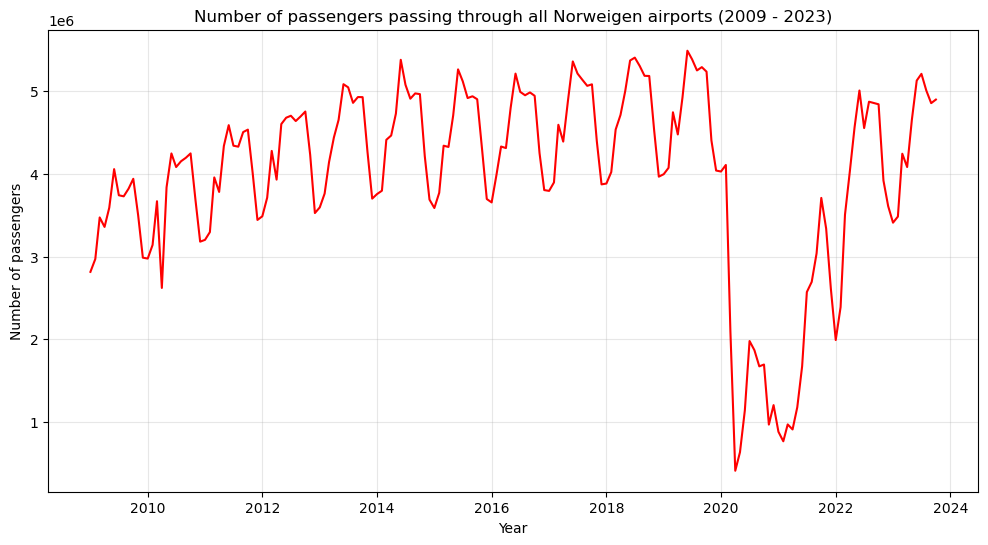

In [121]:
#plotting passenger numbers over time using lineplot
plt.figure(figsize=(12,6))
sns.lineplot(data=norway_pass_agg,x = 'date', y = 'passengers',color='red')
plt.yticks(fontsize=10)
plt.grid(alpha=.3)
plt.xlabel('Year')
plt.ylabel('Number of passengers')
plt.title('Number of passengers passing through all Norweigen airports (2009 - 2023)')
plt.show()

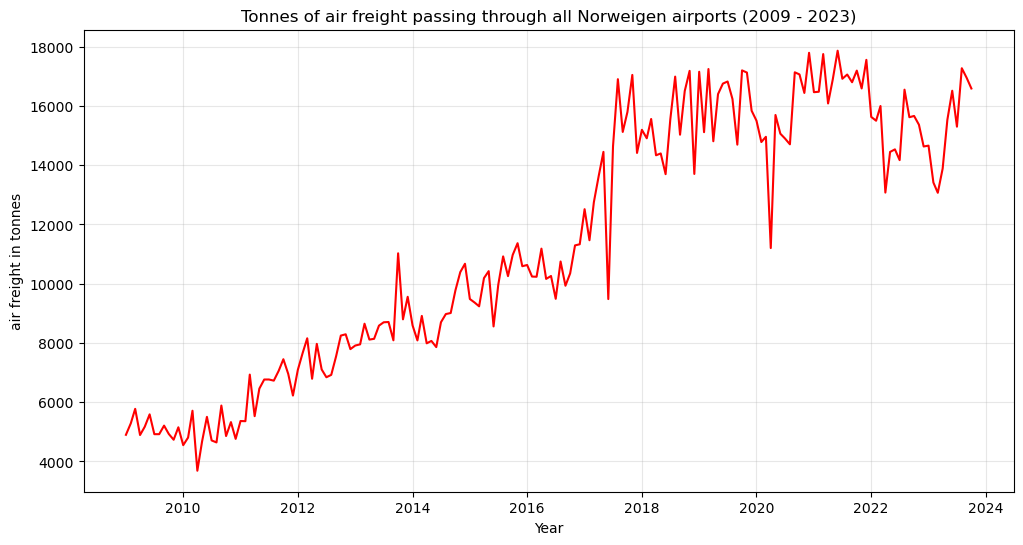

In [122]:
#plotting air freight tonnes over time using lineplot
plt.figure(figsize=(12,6))
sns.lineplot(data=norway_freight_agg,x = 'date', y = 'freight',color='red')
plt.yticks(fontsize=10)
plt.grid(alpha=.3)
plt.xlabel('Year')
plt.ylabel('air freight in tonnes')
plt.title('Tonnes of air freight passing through all Norweigen airports (2009 - 2023)')
plt.show()

**Choice of visualization:**
- Since the data I am dealing with is time series (i.e a sequence of data points indexed in time order) a line plot, using the searborn library will be chosen to get a basic understanding of the individual numerical columns (Passenger, freight, commercial_flights).Line plots are typically chosen for this analysis as they are the best at showing the evolution of time series data over time. (ref: https://towardsdatascience.com/5-types-of-plots-that-will-help-you-with-time-series-analysis-b63747818705#:~:text=A%20time%20plot%20is%20basically,plot%20method%20of%20a%20pd.)<br>

- This choice of chart is in line with Tuftes principle: the number of information carrying (variable) dimensions depicted should not exceed the number of dimensions in the data. Thus, showing the passenger/freight/flight numbers plotted against the date is the most effective way at displaying the trend in these numerical values 
- red was chosen as the colour for these plots as this is indicative of Norweigen data

**Observations:**
- The seasonality of the passenger numbers is very obvious from the plot of passenger numbers. This is a very similar trend to the Irish data.
- The amount of air freight in Norway appears show a steady increase with time during the period (2010 - 2018) and then plateau. 

## 6.4 saving the norweigen data as csvs to be used in my other notebooks:

In [123]:
#saving the unaggregated data
Norway_passenger.to_csv('norway_passenger.csv',index=False)
Norway_freight.to_csv('norway_freight.csv',index=False)

In [124]:
#saving the aggregated data
norway_pass_agg.to_csv('norway_pass_agg.csv',index=False)
norway_freight_agg.to_csv('norway_freight_agg.csv',index=False)

# Section 7 - Loading in the Finland passenger data
source: https://statfin.stat.fi/PxWeb/pxweb/en/StatFin/StatFin__ilma/statfin_ilma_pxt_12ib.px/

In [125]:
Finland_passenger= pd.read_excel('Finland_passenger_data_2019_2023.xlsx')

## 7.1 EDA on Finland dataset

In [126]:
Finland_passenger.head()

,Unnamed: 0,Number of passengers
0,2019M01,1969169
1,2019M02,1951842
2,2019M03,2203647
3,2019M04,2135867
4,2019M05,2269401


In [127]:
Finland_passenger.isnull().sum()

Unnamed: 0              0
Number of passengers    0
dtype: int64

- Due to the simplicity of this dataset for Finish passenger numbers, not much manipulation/processing is required for the dataframe. 

- This will be used for one of the statistical comparisons later in the project.

## 7.2 data manipulation - Finland dataset

In [128]:
#renaming columns
Finland_passenger.columns = ['date','passengers']

In [129]:
#splitting the date column into constituent month and year
Finland_passenger['year'] = Finland_passenger['date'].str[:4]
Finland_passenger['month'] = Finland_passenger['date'].str[4:]

In [130]:
month_dict = {'M01':'1','M02':'2','M03':'3','M04':'4','M05':'5','M06':'6',
              'M07':'7','M08':'8','M09':'9','M10':'10','M11':'11','M12':'12' }
    
Finland_passenger['month'] = Finland_passenger['month'].map(month_dict)
Finland_passenger = Finland_passenger.drop(columns='date')

## 7.3 Saving Finland air traffic dataset to be loaded into other notebooks

In [131]:
#saving to csv to be loaded into statistics notebook
Finland_passenger.to_csv('Finland_passenger.csv',index=False)

# Section 8 - Loading in supplementary datasets for passenger numbers modelling:

Multiple studies into air passenger forecasting have identified the importance of economic data as input features into supervised learning models. These features include GDP (Gross Domestic Product), GNP (Gross National Product) and CPI (Consumer price Index; indicative of how expensive air travel is).

ref: https://link.springer.com/article/10.1007/s11042-023-15552-1

For the purpose of the passenger number predictions using machine learning, I will load in and process this data, and merge to the dataset.

## 8.1 loading in the GDP/GNP data:

In [132]:
## loading in GDP and GNP data from CSO, using read_csv method
economic_metrics = pd.read_csv('NAQ03.20231214T221220.csv')

In [133]:
economic_metrics.head()

,Statistic Label,Quarter,State,UNIT,VALUE
0,GVA at Constant Basic Prices,1995Q1,State,Euro Million,21283
1,GVA at Constant Basic Prices,1995Q2,State,Euro Million,22083
2,GVA at Constant Basic Prices,1995Q3,State,Euro Million,22529
3,GVA at Constant Basic Prices,1995Q4,State,Euro Million,22342
4,GVA at Constant Basic Prices,1996Q1,State,Euro Million,22989


In [134]:
#checking the unique values in the Statistic column
economic_metrics['Statistic Label'].unique()

array(['GVA at Constant Basic Prices', 'Taxes on Products',
       'Subsidies on Products', 'GDP at Constant Market Prices',
       'Net Factor Income from Rest of World',
       'GNP at Constant Market Prices', 'GVA at Current Basic Prices',
       'Taxes on Products at Current Prices',
       'Subsidies on Products at Current Prices',
       'GDP at Current Market Prices',
       'Net Factor Income from Rest of World at Current Prices',
       'GNP at Current Market Prices',
       'GVA at Constant Basic Prices (Seasonally Adjusted)',
       'Taxes on Products (Seasonally Adjusted)',
       'Subsidies on Products (chain linked annually ref to 2019) (Seasonally Adjusted)',
       'GDP at Constant Market Prices (Seasonally Adjusted)',
       'Net Factor Income from Rest of World (Seasonally Adjusted)',
       'GNP at Constant Market Prices (Seasonally Adjusted)',
       'GVA at Current Basic Prices (Seasonally Adjusted)',
       'Taxes on Products at Current Prices (Seasonally Adjusted

In [135]:
#selecting out the GDP and GNP data, as this is all I want to use for the modelling:
gdp_gnp = economic_metrics[economic_metrics['Statistic Label'].isin(['GDP at Constant Market Prices',
                                                                     'GNP at Constant Market Prices'])]

In [136]:
#dropping unwanted columns
gdp_gnp = gdp_gnp.drop(columns=['UNIT','State'])

In [137]:
#only selecting data that is after 2005 (i.e so we can merge with the Irish freight volume data)
gdp_gnp = gdp_gnp[gdp_gnp['Quarter']>'2004Q4']

In [138]:
#converting VALUE to actual values (i.e units are given in millions from raw data)
gdp_gnp['VALUE'] = gdp_gnp['VALUE']*1e6

In [139]:
#pivoting on Statistic Label 
gdp_gnp = gdp_gnp.pivot(index='Quarter',columns='Statistic Label',values='VALUE')

gdp_gnp = gdp_gnp.reset_index()

In [140]:
#renaming columns to simplified format
gdp_gnp = gdp_gnp.rename(columns={'GDP at Constant Market Prices':'gdp',
                        'GNP at Constant Market Prices':'gnp'})
gdp_gnp.head()

Statistic Label,Quarter,gdp,gnp
0,2005Q1,4.790600e+10,4.145900e+10
1,2005Q2,4.953900e+10,4.188200e+10
2,2005Q3,4.844700e+10,4.261900e+10
3,2005Q4,5.111600e+10,4.514100e+10
4,2006Q1,5.097500e+10,4.427400e+10


## 8.2 loading in Consumer price index data

In [153]:
## loading in Consumer price index data
cpi = pd.read_csv('CPM16.20231214T221259.csv')

In [154]:
cpi = cpi[cpi['Statistic Label']=='Consumer Price Index']

In [155]:
#splitting up the Month into year and month
cpi['year'] = cpi['Month'].str[:4]
cpi['month'] = cpi['Month'].str[5:]

In [156]:
#selecting out the data for after 2005
cpi = cpi[cpi['year']>'2004']

In [157]:
cpi = cpi.drop(columns=['Statistic Label','UNIT','Detailed Sub Indices','Month'])

In [158]:
##creating a dictionary to map Quarter to month of the year
Quarter_map_={'January':'Q1',
            'February':'Q1',
            'March':'Q1',
            'April':'Q2',
            'May':'Q2',
            'June':'Q2',
            'July':'Q3',
            'August':'Q3',
            'September':'Q3',
            'October':'Q4',
            'November':'Q4',
            'December':'Q4'}

In [159]:
#creating a Quarter column by mapping each month to the associated Quarter defined in the dictionary above
cpi['Quarter'] = cpi['month'].map(Quarter_map_)

#dropping the month column as this is now longer needed
cpi = cpi.drop(columns = 'month')

In [160]:
#resorting the dataframe based on year and Quarter
cpi = cpi.sort_values(['year','Quarter']).reset_index().drop(columns = 'index')

In [161]:
#getting to total for each quarter in each year
cpi = cpi.groupby(['year','Quarter'])[['VALUE']].sum().reset_index()

In [162]:
#merging year and Quarter so that the format is aligned with the gdp_gnp data
cpi['Quarter']=cpi['year']+cpi['Quarter']

In [163]:
cpi = cpi.rename(columns={'VALUE':'consumer_price_index'})

In [164]:
cpi.head()

,year,Quarter,consumer_price_index
0,2005,2005Q1,264.2
1,2005,2005Q2,291.2
2,2005,2005Q3,335.9
3,2005,2005Q4,294.8
4,2006,2006Q1,345.6


# Section 9 - merging the Irish air traffic datasets with economic metrics

#### Now that I have collected each of the features from the above datasets, I will now merge these to the air traffic data, to get the final dataset to be used for the modelling section:

- For the modelling I will use the aggregated airtraffic dataframe as I not interested in the breakdown by airport/country/type etc.

In [165]:
airtraffic_agg.head()

,year,month,passengers,freight,commercial_flights
0,2005,1,1533700.0,5600.0,16900.0
1,2005,10,2220600.0,11800.0,21000.0
2,2005,11,1857000.0,12000.0,18300.0
3,2005,12,1842300.0,12600.0,18000.0
4,2005,2,1569600.0,6100.0,16100.0


- I will need to convert the airtraffic_agg dataset into quarterly data to enable it to be merged to the economic data

In [166]:
#airtraffic_agg =  pd.read_csv('ireland_airtraffic_agg.csv')

In [167]:
#creating a new dataframe, so as not to override the old dataframe
airtraffic_agg_new = airtraffic_agg.copy()

In [168]:
airtraffic_agg_new

,year,month,passengers,freight,commercial_flights
0,2005,1,1533700.0,5600.0,16900.0
1,2005,10,2220600.0,11800.0,21000.0
2,2005,11,1857000.0,12000.0,18300.0
3,2005,12,1842300.0,12600.0,18000.0
4,2005,2,1569600.0,6100.0,16100.0
...,...,...,...,...,...
214,2022,8,3608300.0,13600.0,23300.0
215,2022,9,3240800.0,13800.0,22400.0
216,2023,1,2416800.0,11300.0,19100.0
217,2023,2,2361300.0,11900.0,17200.0


In [169]:
##creating a dictionary to map Quarter to month of the year
Quarter_map={'1':'Q1','2':'Q1','3':'Q1', '4':'Q2','5':'Q2','6':'Q2','7':'Q3','8':'Q3', '9':'Q3','10':'Q4','11':'Q4','12':'Q4'}

In [170]:
#creating a Quarter column using the above mapping dictionary
airtraffic_agg_new['Quarter'] = airtraffic_agg_new['month'].map(Quarter_map)

In [171]:
#dropping the monthly data
airtraffic_agg_new = airtraffic_agg_new.drop(columns = 'month')

In [172]:
#reaggregating
airtraffic_agg_new = airtraffic_agg_new.groupby(['year','Quarter'])[['passengers','freight','commercial_flights']].sum().reset_index()

In [173]:
#converting year to a string so it can be merged to Quarter, to keep same format as economic data
airtraffic_agg_new['year']=airtraffic_agg_new['year'].apply(str)

airtraffic_agg_new['Quarter']=airtraffic_agg_new['year']+airtraffic_agg_new['Quarter']

In [174]:
airtraffic_agg_new.head()

,year,Quarter,passengers,freight,commercial_flights
0,2005,2005Q1,4998800.0,18100.0,51100.0
1,2005,2005Q2,6587700.0,18200.0,62000.0
2,2005,2005Q3,7924600.0,27600.0,69500.0
3,2005,2005Q4,5919900.0,36400.0,57300.0
4,2006,2006Q1,5647600.0,36900.0,55400.0


In [175]:
##combining the datasets: airtraffic_agg_new, gnp_gdp, imp_exp, road_freight
merged_df  = airtraffic_agg_new.merge(gdp_gnp, on='Quarter',how='left')
merged_df  = merged_df.merge(cpi, on='Quarter',how='left')
merged_df = merged_df.drop(columns = 'year_y')
merged_df = merged_df.rename(columns={'year_x':'year'})

In [176]:
#removing covid data as this is an anomoly within the data
merged_df = merged_df[merged_df['year']<'2020']

In [177]:
#splitting back up into quarterly
merged_df['Quarter']=merged_df['Quarter'].str[4:].values

In [178]:
#saving final dataset to be used for regression models
merged_df.to_csv('merged_df.csv',index=False)

In [179]:
merged_df.head()

,year,Quarter,passengers,freight,commercial_flights,gdp,gnp,consumer_price_index
0,2005,Q1,4998800.0,18100.0,51100.0,4.790600e+10,4.145900e+10,264.2
1,2005,Q2,6587700.0,18200.0,62000.0,4.953900e+10,4.188200e+10,291.2
2,2005,Q3,7924600.0,27600.0,69500.0,4.844700e+10,4.261900e+10,335.9
3,2005,Q4,5919900.0,36400.0,57300.0,5.111600e+10,4.514100e+10,294.8
4,2006,Q1,5647600.0,36900.0,55400.0,5.097500e+10,4.427400e+10,345.6
